In [4]:
# The objective of this case study is to analyze data in order to uncover trends and factors that can predict whether a client will struggle to make their loan payments. 
# These insights will be utilized to make informed decisions such as adjusting loan terms, interest rates, or even rejecting loan applications, with the goal of approving loans for individuals who are likely to repay while identifying those at risk of default. 
# The main focus is to use exploratory data analysis (EDA) techniques to identify key variables that strongly correlate with loan defaults.

In [8]:
# filter out all warnings

import warnings

warnings.filterwarnings('ignore')

In [51]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [133]:
# Import Dataset

df=pd.read_csv("D:/EDA project/application_data.csv")

In [16]:
df.shape

(307511, 122)

In [17]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [18]:
df.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
307506                         NaN                        NaN   
307507                         NaN                        NaN   
307508                         0.0                        1.0   
307509                         0.0                        0.0   
307510                         0.0                        2.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
307506                        NaN                         NaN  
307507                        NaN                         NaN  
307508                        0.0                         1.0  
307509                        0.0                         0.0  
307510                        0.0                         1.0  

[5 rows x 122 columns]

In [19]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [22]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [23]:
# Clean missing data
# list columns having more than 30% null value

emptycol=df.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)

64

In [24]:
# 64 columns have null values greater than 30% of dataset
# deleting those 64 columns for better understanding

emptycol = list(emptycol[emptycol.values>=0.3].index)
df.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

64


In [25]:
df.isnull().sum()/len(df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [26]:
# Given that the 'AMT_ANNUITY' column exhibits only a small number of null values, the focus is on imputing these missing values. 
# Notably, this column contains an outlier with an exceptionally high value, making the use of the mean unsuitable for imputation.
# In this scenario, the median emerges as the preferred choice for filling the gaps in the data. 
# By leveraging the median, the missing values can be imputed in a way that is less influenced by outliers. 
# Ensuring a more robust representation of the data distribution.


In [27]:
# Replacing missing values with median
values=df['AMT_ANNUITY'].median()

df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [28]:
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [29]:
# Deleting rows having null values greater than or equal to 30%

emptyrow=df.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(df)].index)
df.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [30]:
# Removing columns that are not required for EDA

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted,axis=1,inplace=True)

In [31]:
# In the dataset, certain columns contain the value 'XNA,' which presumably signifies 'Not Available.' 
# It is imperative to determine the count of rows and columns affected by these instances. 
# Following this assessment, appropriate strategies can be employed to handle these missing values effectively. 
# Depending on the extent and relevance of these 'XNA' values, either imputation techniques should be applied to fill the gaps or, if deemed appropriate, the rows or columns containing these values could be removed from the dataset. 
# By executing these steps, the dataset's integrity and analytical accuracy can be enhanced.

In [32]:
df[df['CODE_GENDER']=='XNA'].shape


(4, 28)

In [33]:
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

In [34]:
# The dataset reveals that the 'Gender' column contains 4 rows with unspecified values
# While the 'Organization Type' column encompasses 55374 rows marked as 'Not Available.'
# imputation for 'Gender' with the mode or deletion of these rows, and for the 'Organization Type,'

In [35]:
# Ccheck the number of females and males

df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [36]:
#  Only 4 rows were having NA values, we can update those columns with Gender 'F' as there will be no major impact 
# Updating 4 columns to "F" 

df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [37]:
df['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [38]:
# check for organization type feild and chcking for 'XNA' Feilds
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [39]:
# Dropping XNA ( Not avalible) values
df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [40]:
# Changing all variable into numeric in the data

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric)
df.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ... DAYS_ID_PUBLISH WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0  ...           -2120                  WEDNESDAY                      10   
1  ...            -291                     MONDAY                      11   
2  ...           -2531                     MONDAY                       9   
3  ...           -2437                  WEDNESDAY                      17   
4  ...           -3458                   THURSDAY                      11   

  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  
0                       0                        0  Business Entity Type 3  
1                       0                        0                  School  
2                       0                        0              Government  
3                       0                        0  Business Entity Type 3  
4                       1                        1                Religion  

[5 rows x 28 columns]

In [41]:
# Creating bins for continous variable columns 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [42]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

In [43]:
# Seperating the dataset into two datasets of  target=1(customers with payment difficulties) and target=0(all other)

target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]

In [44]:
# Calculating Irregularity percentage
    
# Since the majority is target0 and minority is target1

round(len(target0_df)/len(target1_df),2)

10.55

In [47]:
########################## Univariate analysis for categories  #####################

####  Categorical Univariate Analysis in logarithmic scale for target = 0 (Customer with no payment difficulties) ####

In [64]:

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 40
    plt.rcParams['axes.titlesize'] = 50
    plt.rcParams['axes.titlepad'] = 60
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='icefire') 
        
    plt.show()

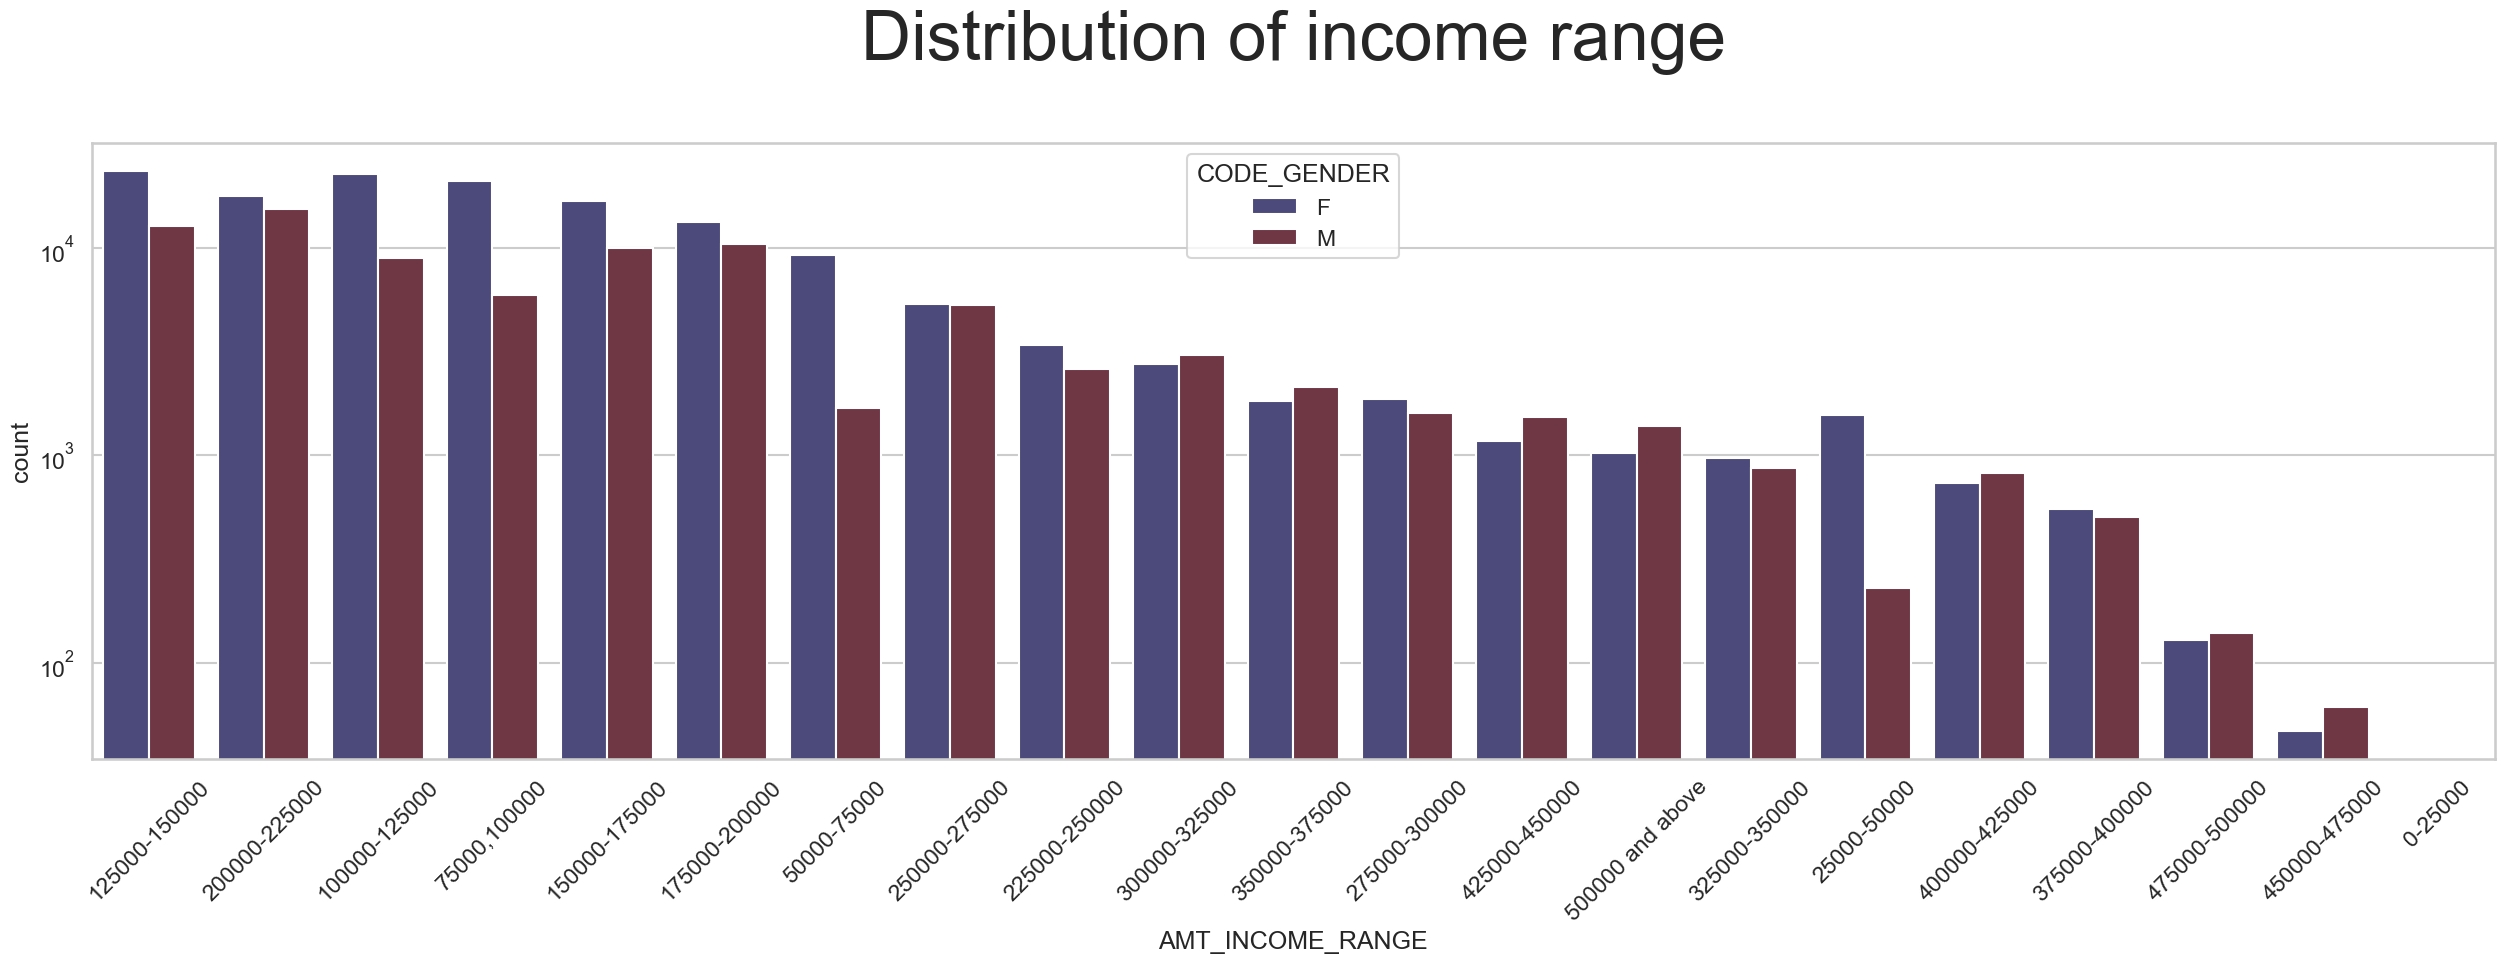

In [65]:
# PLot for AMT_INCOME_RANGE

uniplot(target0_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

In [66]:
####     Key observations drawn from the provided graph include:

        ## 1. Gender Distribution: The graph illustrates a higher count of females compared to males.
        ## 2. Credit Distribution by Income: The range of income spanning from 100,000 to 200,000 exhibits a notable concentration of credit occurrences.
        ## 3. Gender and Credit: This depiction unveils that within the aforementioned income range (100,000 to 200,000), the number of females surpasses that of males in obtaining credits.
        ## 4. Sparse Credit Uptake: Notably, there is a significant scarcity in credit uptake for individuals with income levels of 400,000 and beyond.

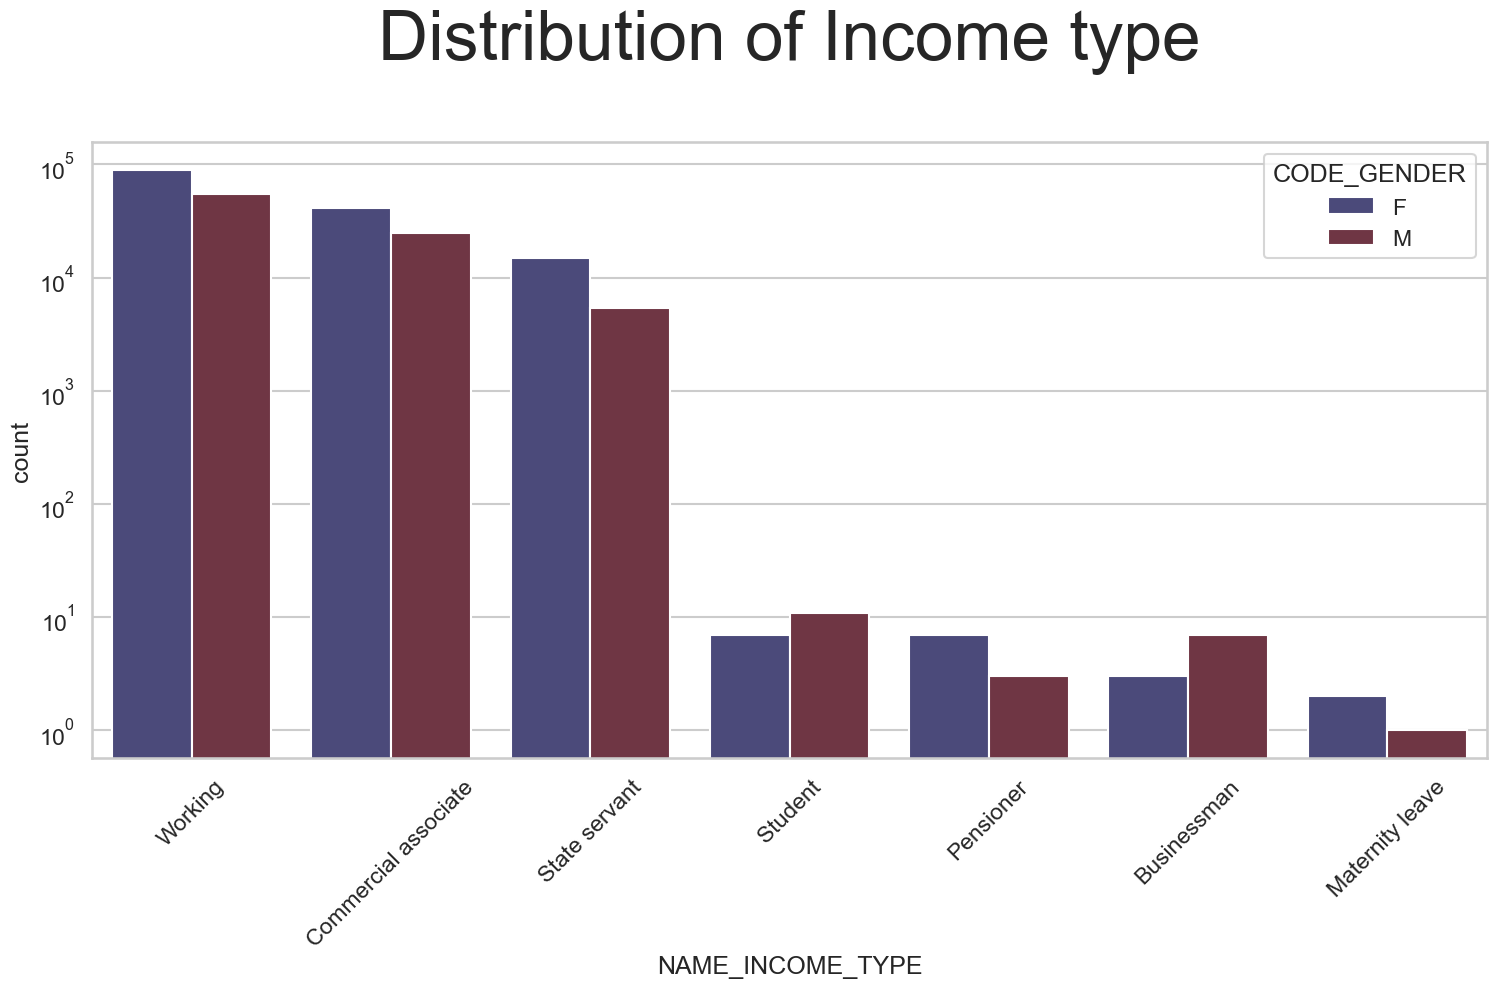

In [67]:
# Plot for NAME_INCOME_TYPE

uniplot(target0_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

In [69]:
##### Key takeaways from the presented graph include:

        # 1. Income Type and Credit Distribution: The graph indicates that the categories 'working,' 'commercial associate,' and 'State Servant' exhibit a substantial prevalence of credit acquisition compared to the other income types.
        # 2. Gender and Credit Distribution: Within the aforementioned income categories, females tend to secure a higher count of credits in comparison to males.
        # 3. Limited Credit Uptake: Conversely, there is a noticeable dearth of credit instances among individuals with income types such as 'student,' 'pensioner,' 'Businessman,' and those on 'Maternity leave.'


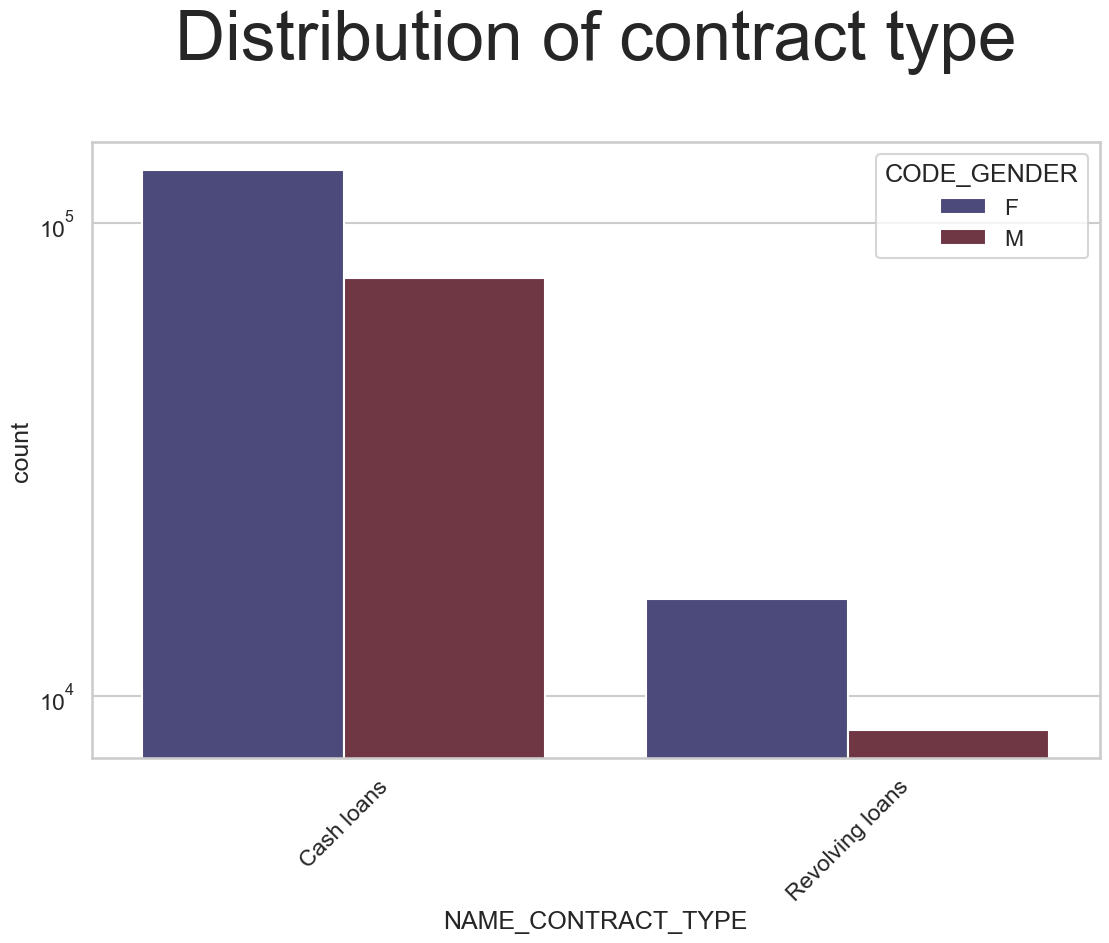

In [70]:
# Plot for Contract type

uniplot(target0_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')


In [71]:
####    Key observations drawn from the provided graph are as follows:

        # 1. Credit Type Comparison: The graph reveals that the category 'cash loans' exhibits a notably higher count of credit occurrences in comparison to 'Revolving loans.'
        # 2. Gender and Credit Type: Within the 'cash loans' category, females take the lead in applying for credits.

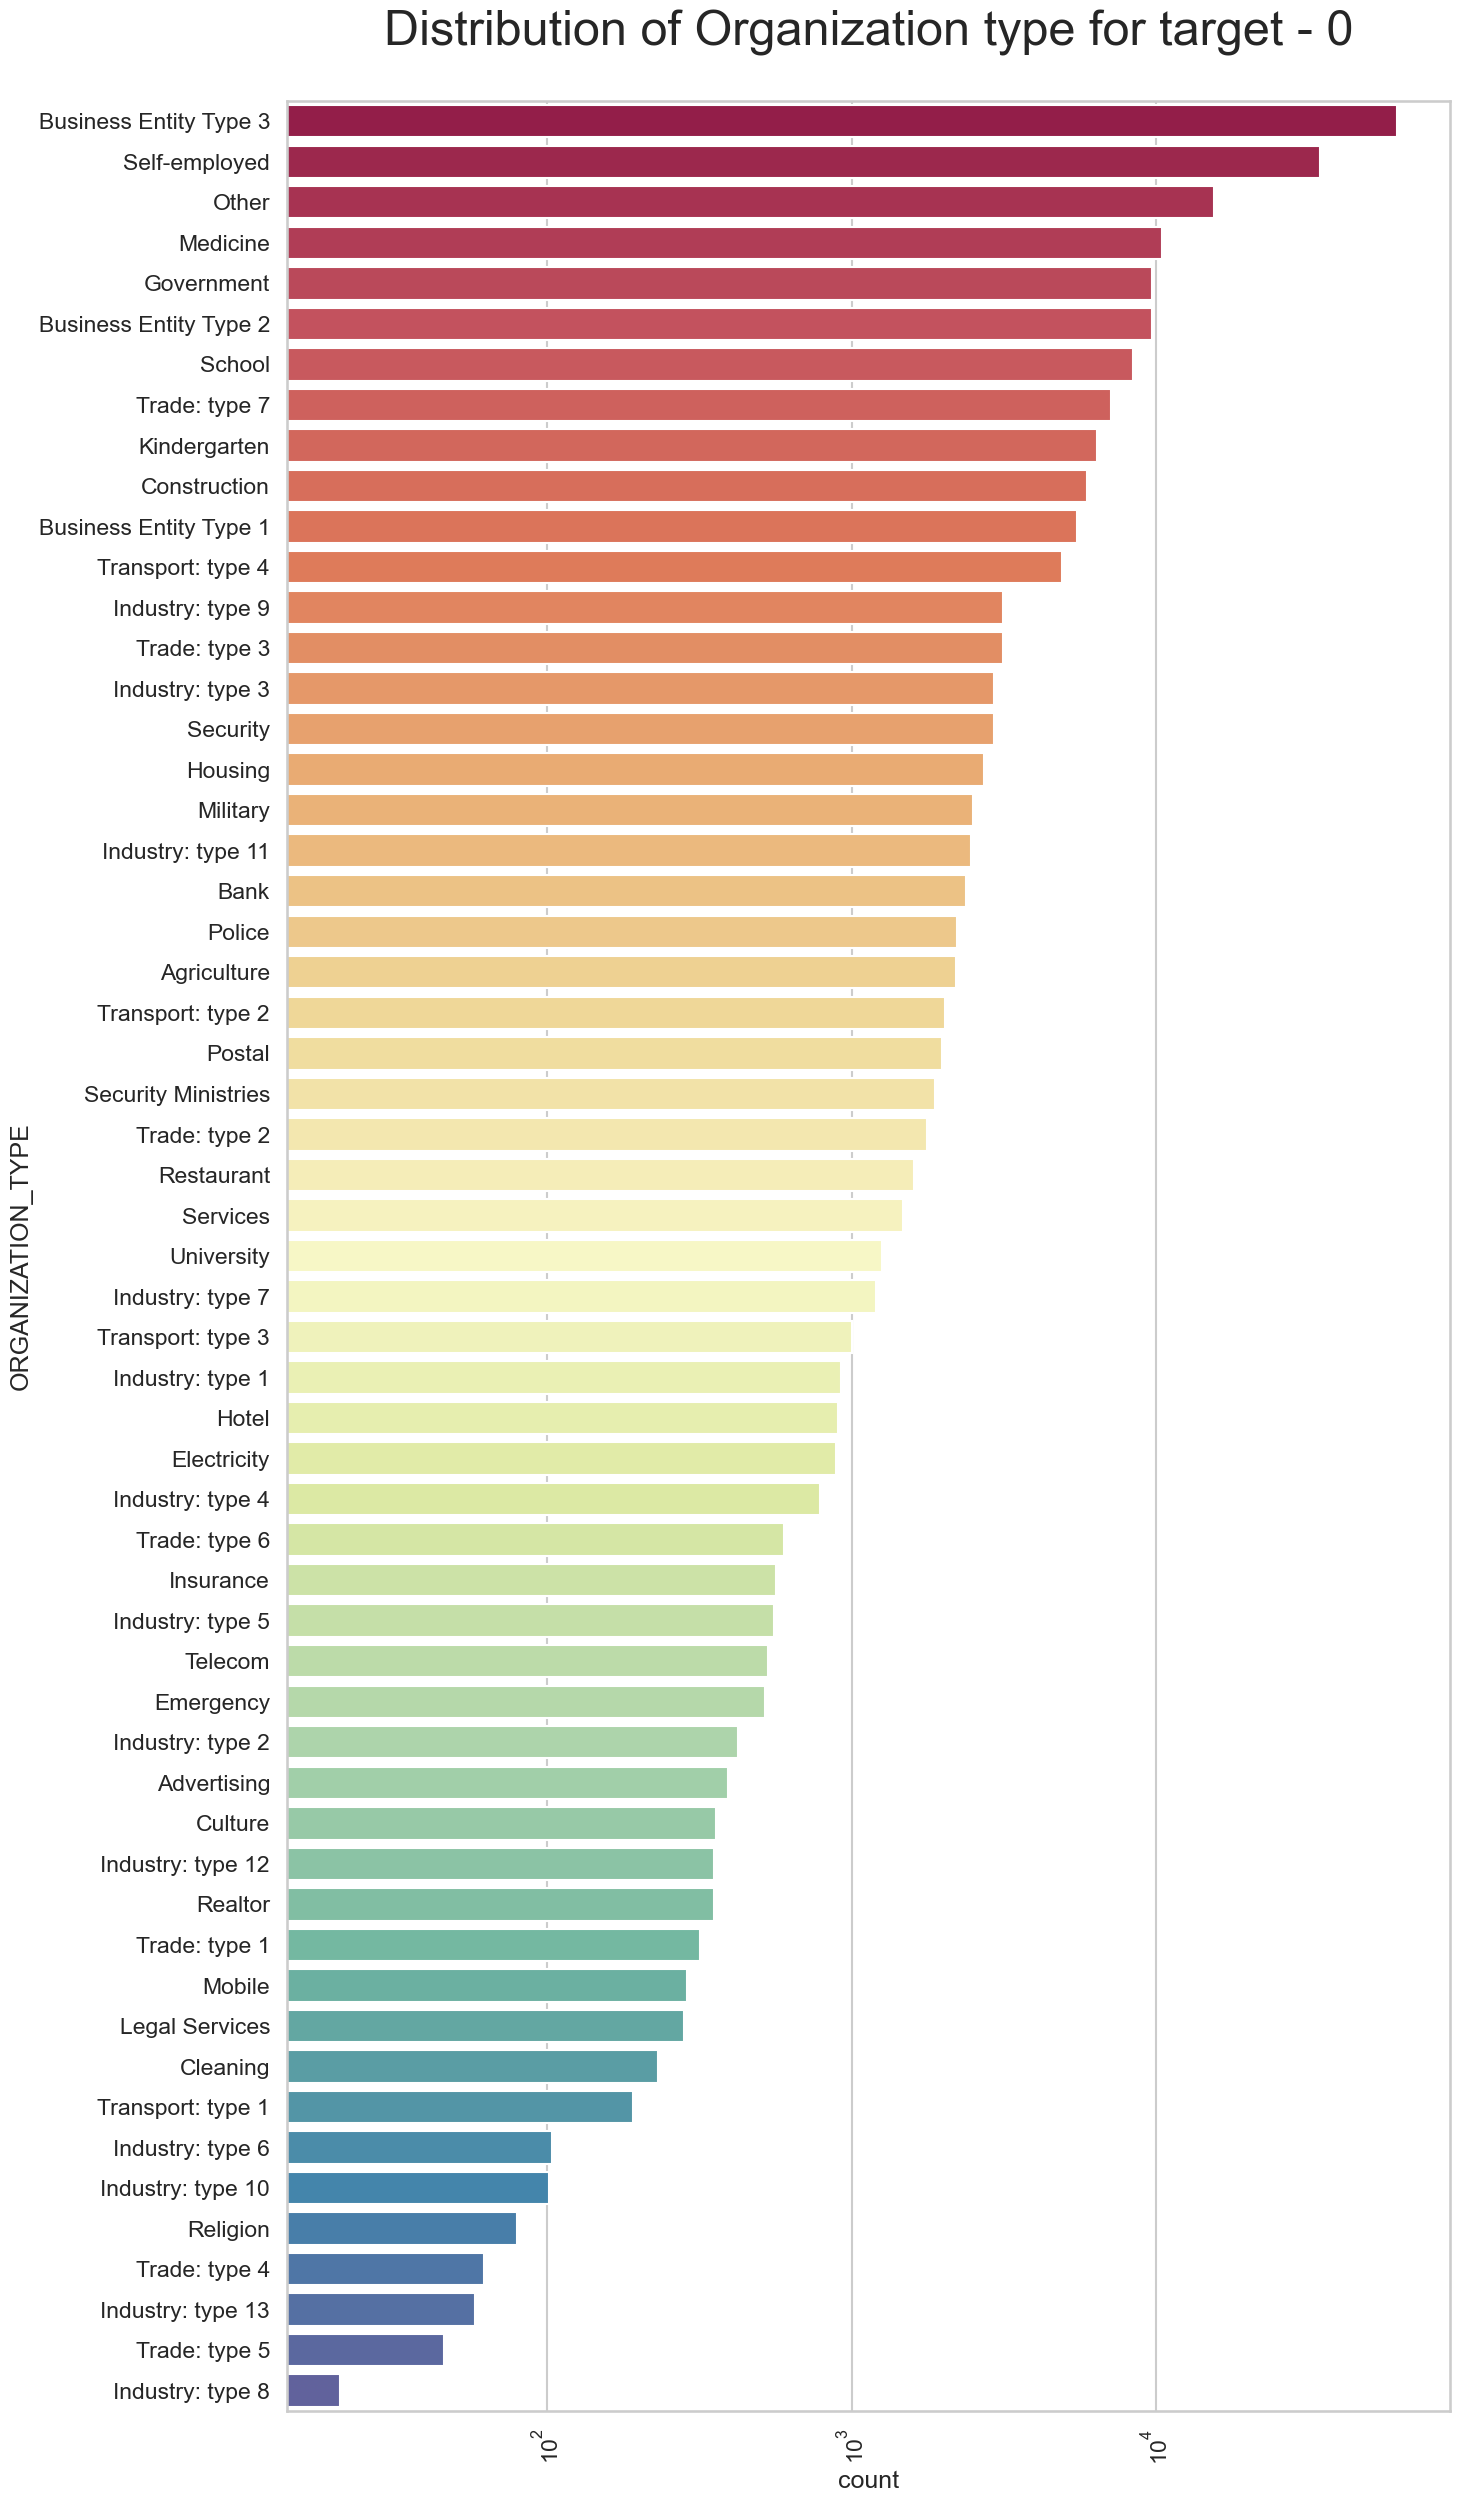

In [73]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 35
plt.rcParams['axes.titlepad'] = 40

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='Spectral')

plt.show()

In [74]:
#### Key observations derived from the presented graph include:

    # 1. Prominent Organization Types: The graph illustrates that clients who have applied for credits predominantly belong to various organization types such as 'Business entity Type 3,' 'Self employed,' 'Other,' 'Medicine,' and 'Government.'
    # 2. Limited Representation: Conversely, there is a lower representation of clients from organization types like 'Industry type 8,' 'type 6,' 'type 10,' 'religion and trade type 5,' and 'type 4.'

In [75]:
########################## Univariate analysis for categories  #####################

####  Categorical Univariate Analysis in logarithmic scale for target = 1 (Customer with payment difficulties) ####

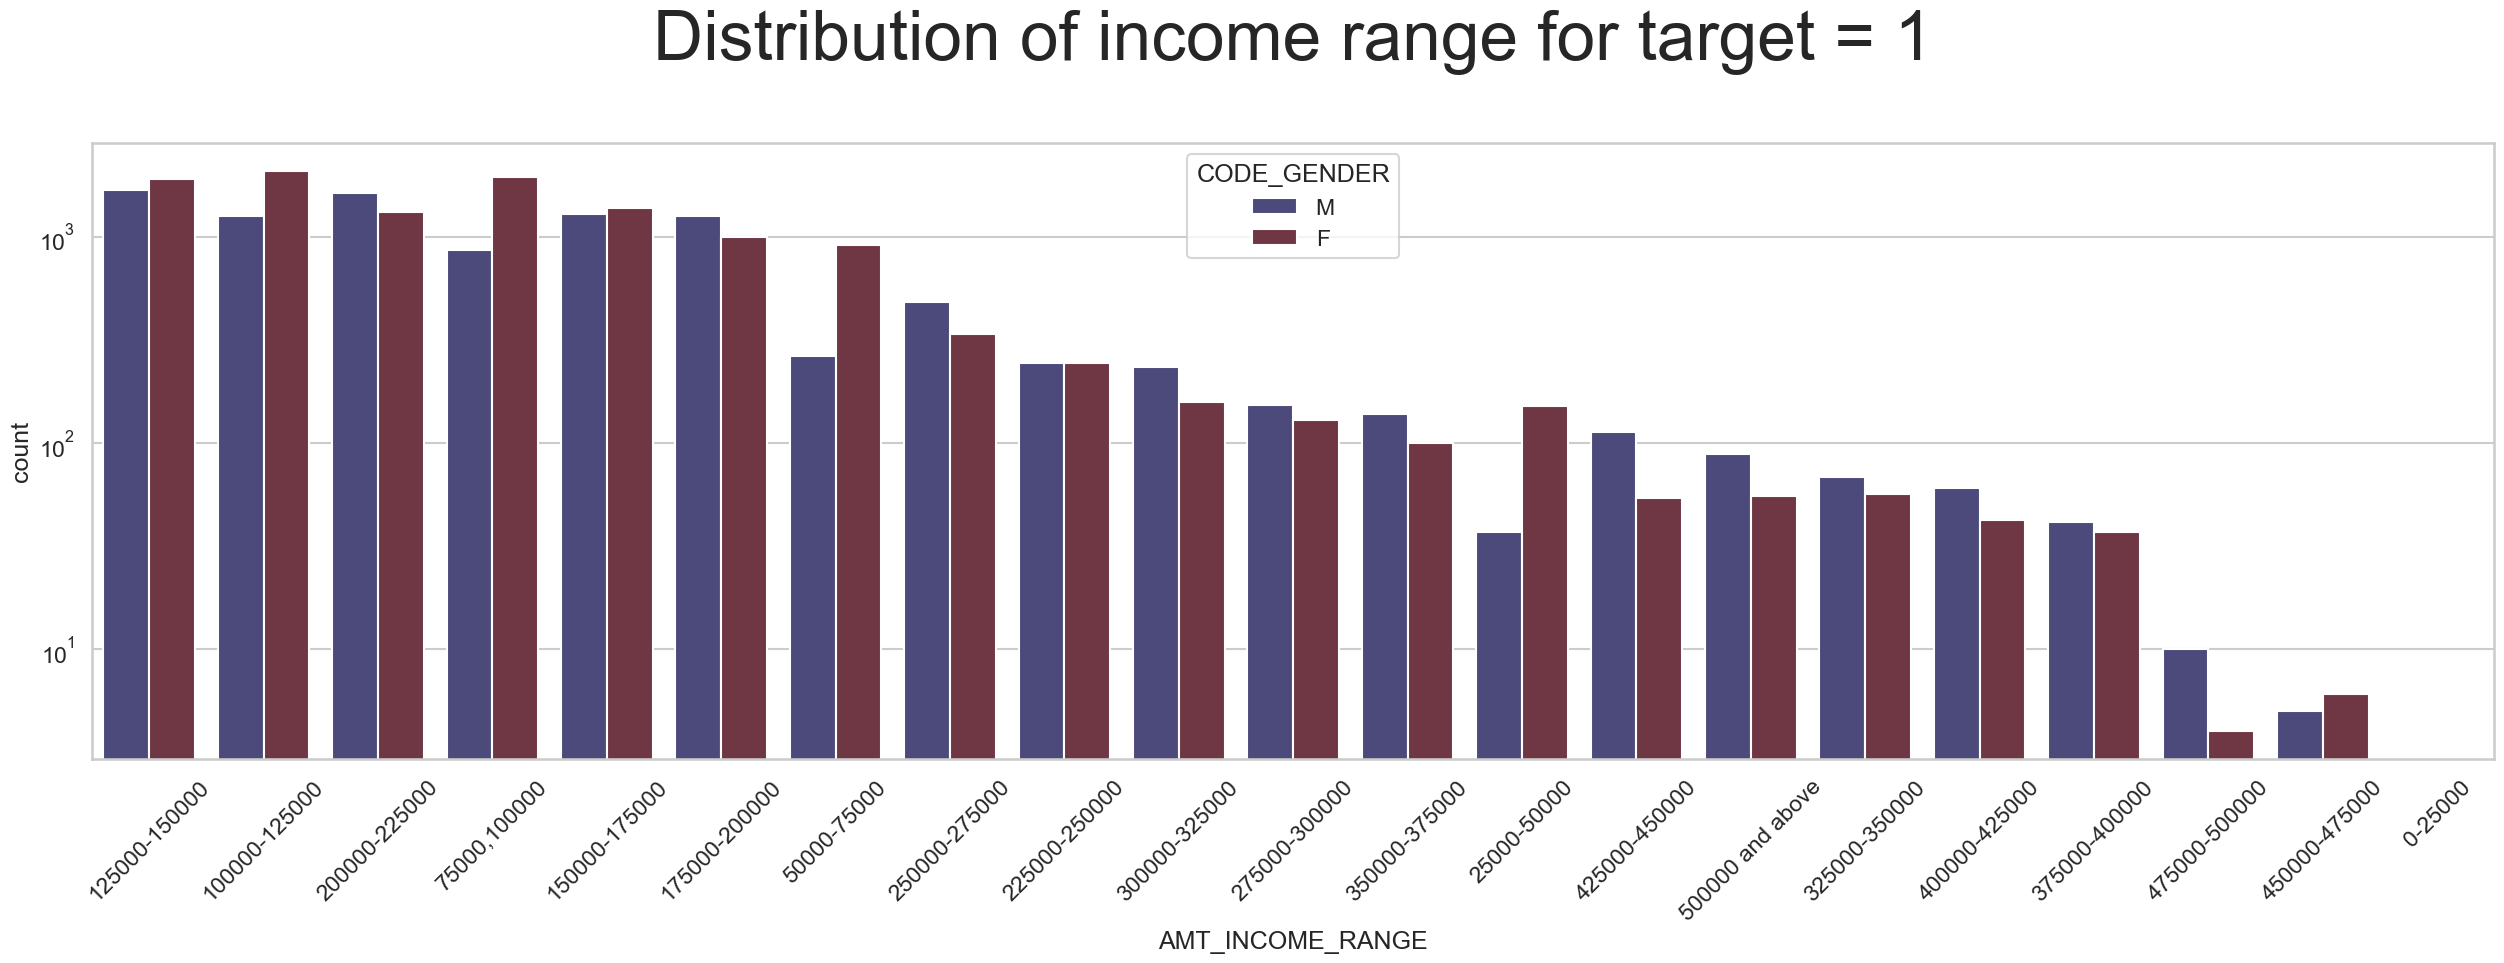

In [77]:
# PLot for income range

uniplot(target1_df,col='AMT_INCOME_RANGE',title='Distribution of income range for target = 1',hue='CODE_GENDER')

In [78]:
####    Key takeaways from the presented graph are as follows:

    #1.Gender Distribution: The graph indicates that, overall, the count of males is greater than that of females.
    #2.Credit Distribution by Income: Within the dataset, there is a notable concentration of credit occurrences in the income range between 100,000 and 200,000.
    #3.Limited High-Income Credits: Conversely, there is a considerably lower number of credit instances for individuals with income levels of 400,000 and beyond.

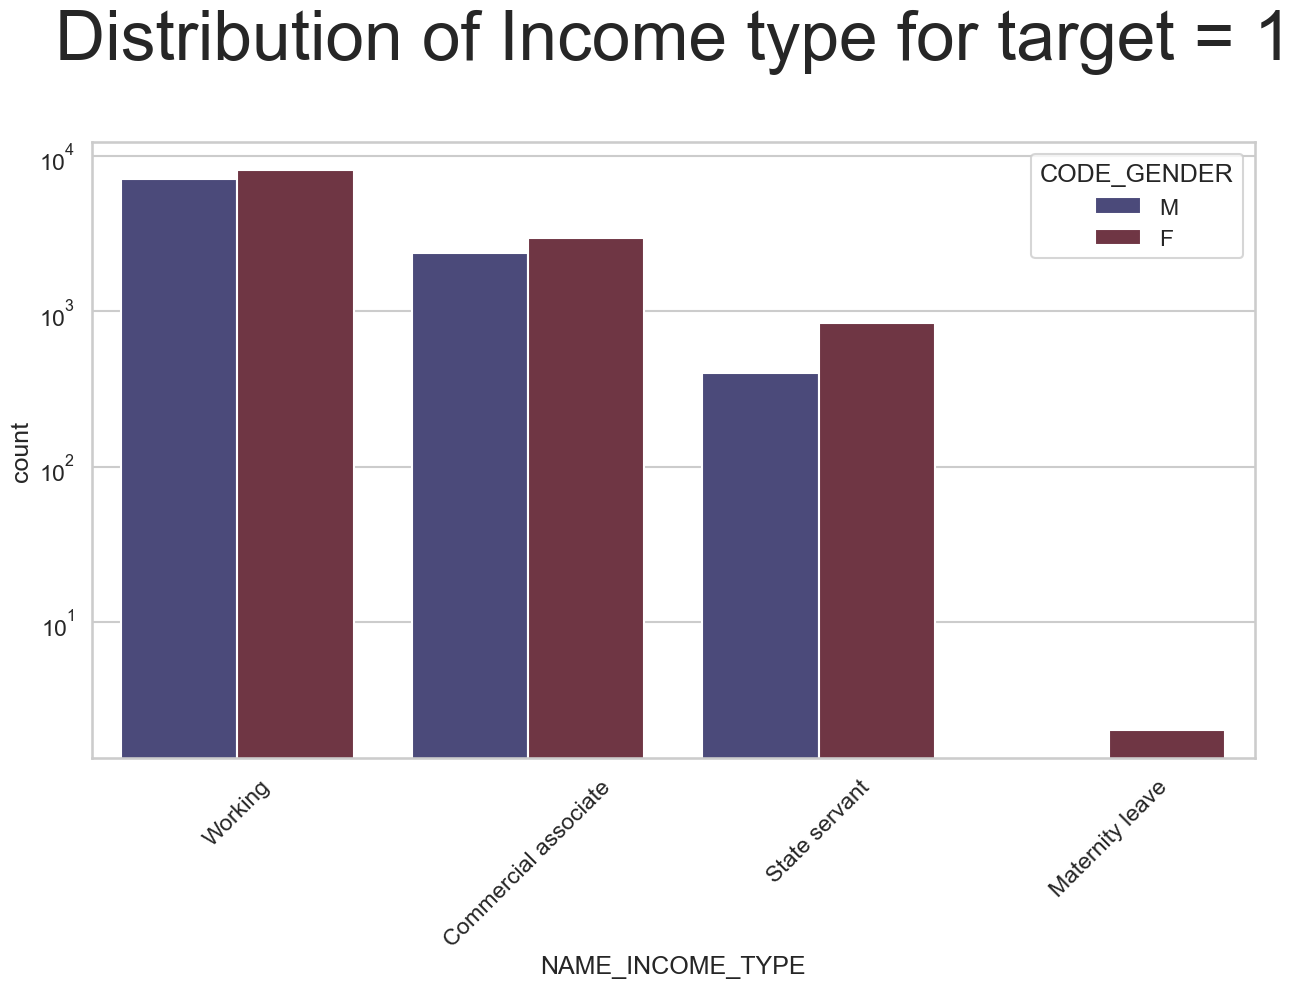

In [79]:
# Plot for Income type

uniplot(target1_df,col='NAME_INCOME_TYPE',title='Distribution of Income type for target = 1',hue='CODE_GENDER')

In [80]:
#### Key observations drawn from the provided graph include:

    #1. Income Type and Credit Distribution: The graph indicates that among various income types, such as 'working,' 'commercial associate,' and 'State Servant,' the number of credits is notably higher compared to the 'Maternity leave' income type.
    #2. Gender and Credit Distribution: Within the aforementioned income categories, females tend to secure a higher number of credits in comparison to males.
    #3. Limited Credit Uptake and Target Analysis: The 'Maternity leave' income type demonstrates a lower count of credits, potentially due to the specific circumstances associated with it. Furthermore, for the 'target = 1' group, there is an absence of income types like 'student,' 'pensioner,' and 'Businessman,' which implies a lack of late payments within these categories.

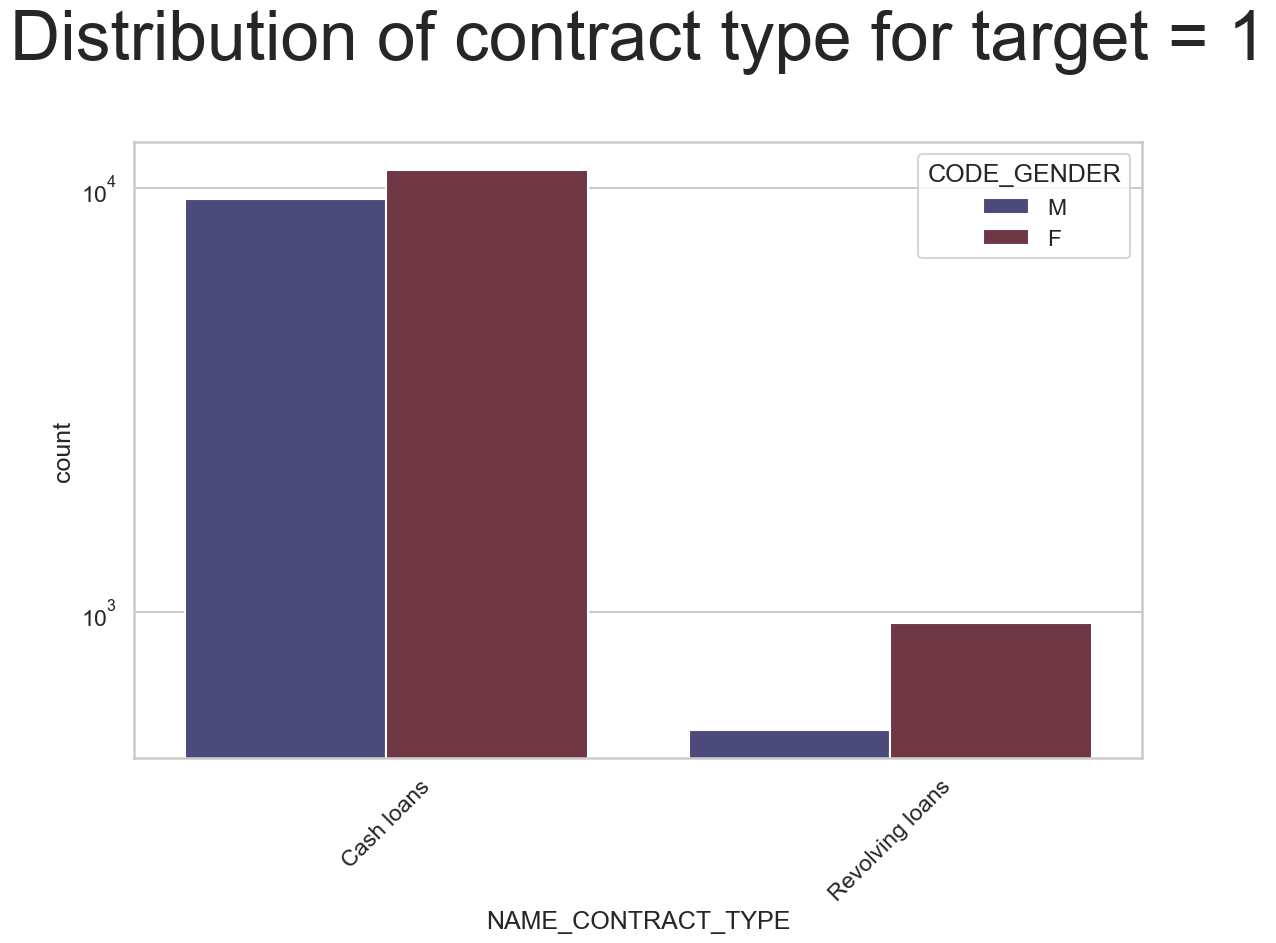

In [81]:
# Plot for Contract type

uniplot(target1_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type for target = 1',hue='CODE_GENDER')

In [82]:
#### Key insights drawn from the presented graph include:

    #1. Credit Type Comparison: The graph illustrates a higher count of 'cash loans' compared to 'Revolving loans.'
    #2. Gender and Credit Type: Within both 'cash loans' and 'Revolving loans' categories, females are more prominent in terms of applying for credits.
    #3. Target and Gender Interaction: Specifically, in the 'Revolving loans' category for 'target = 1,' only females have applied for these loans, indicating a unique gender-based trend for this specific credit type and target combination.

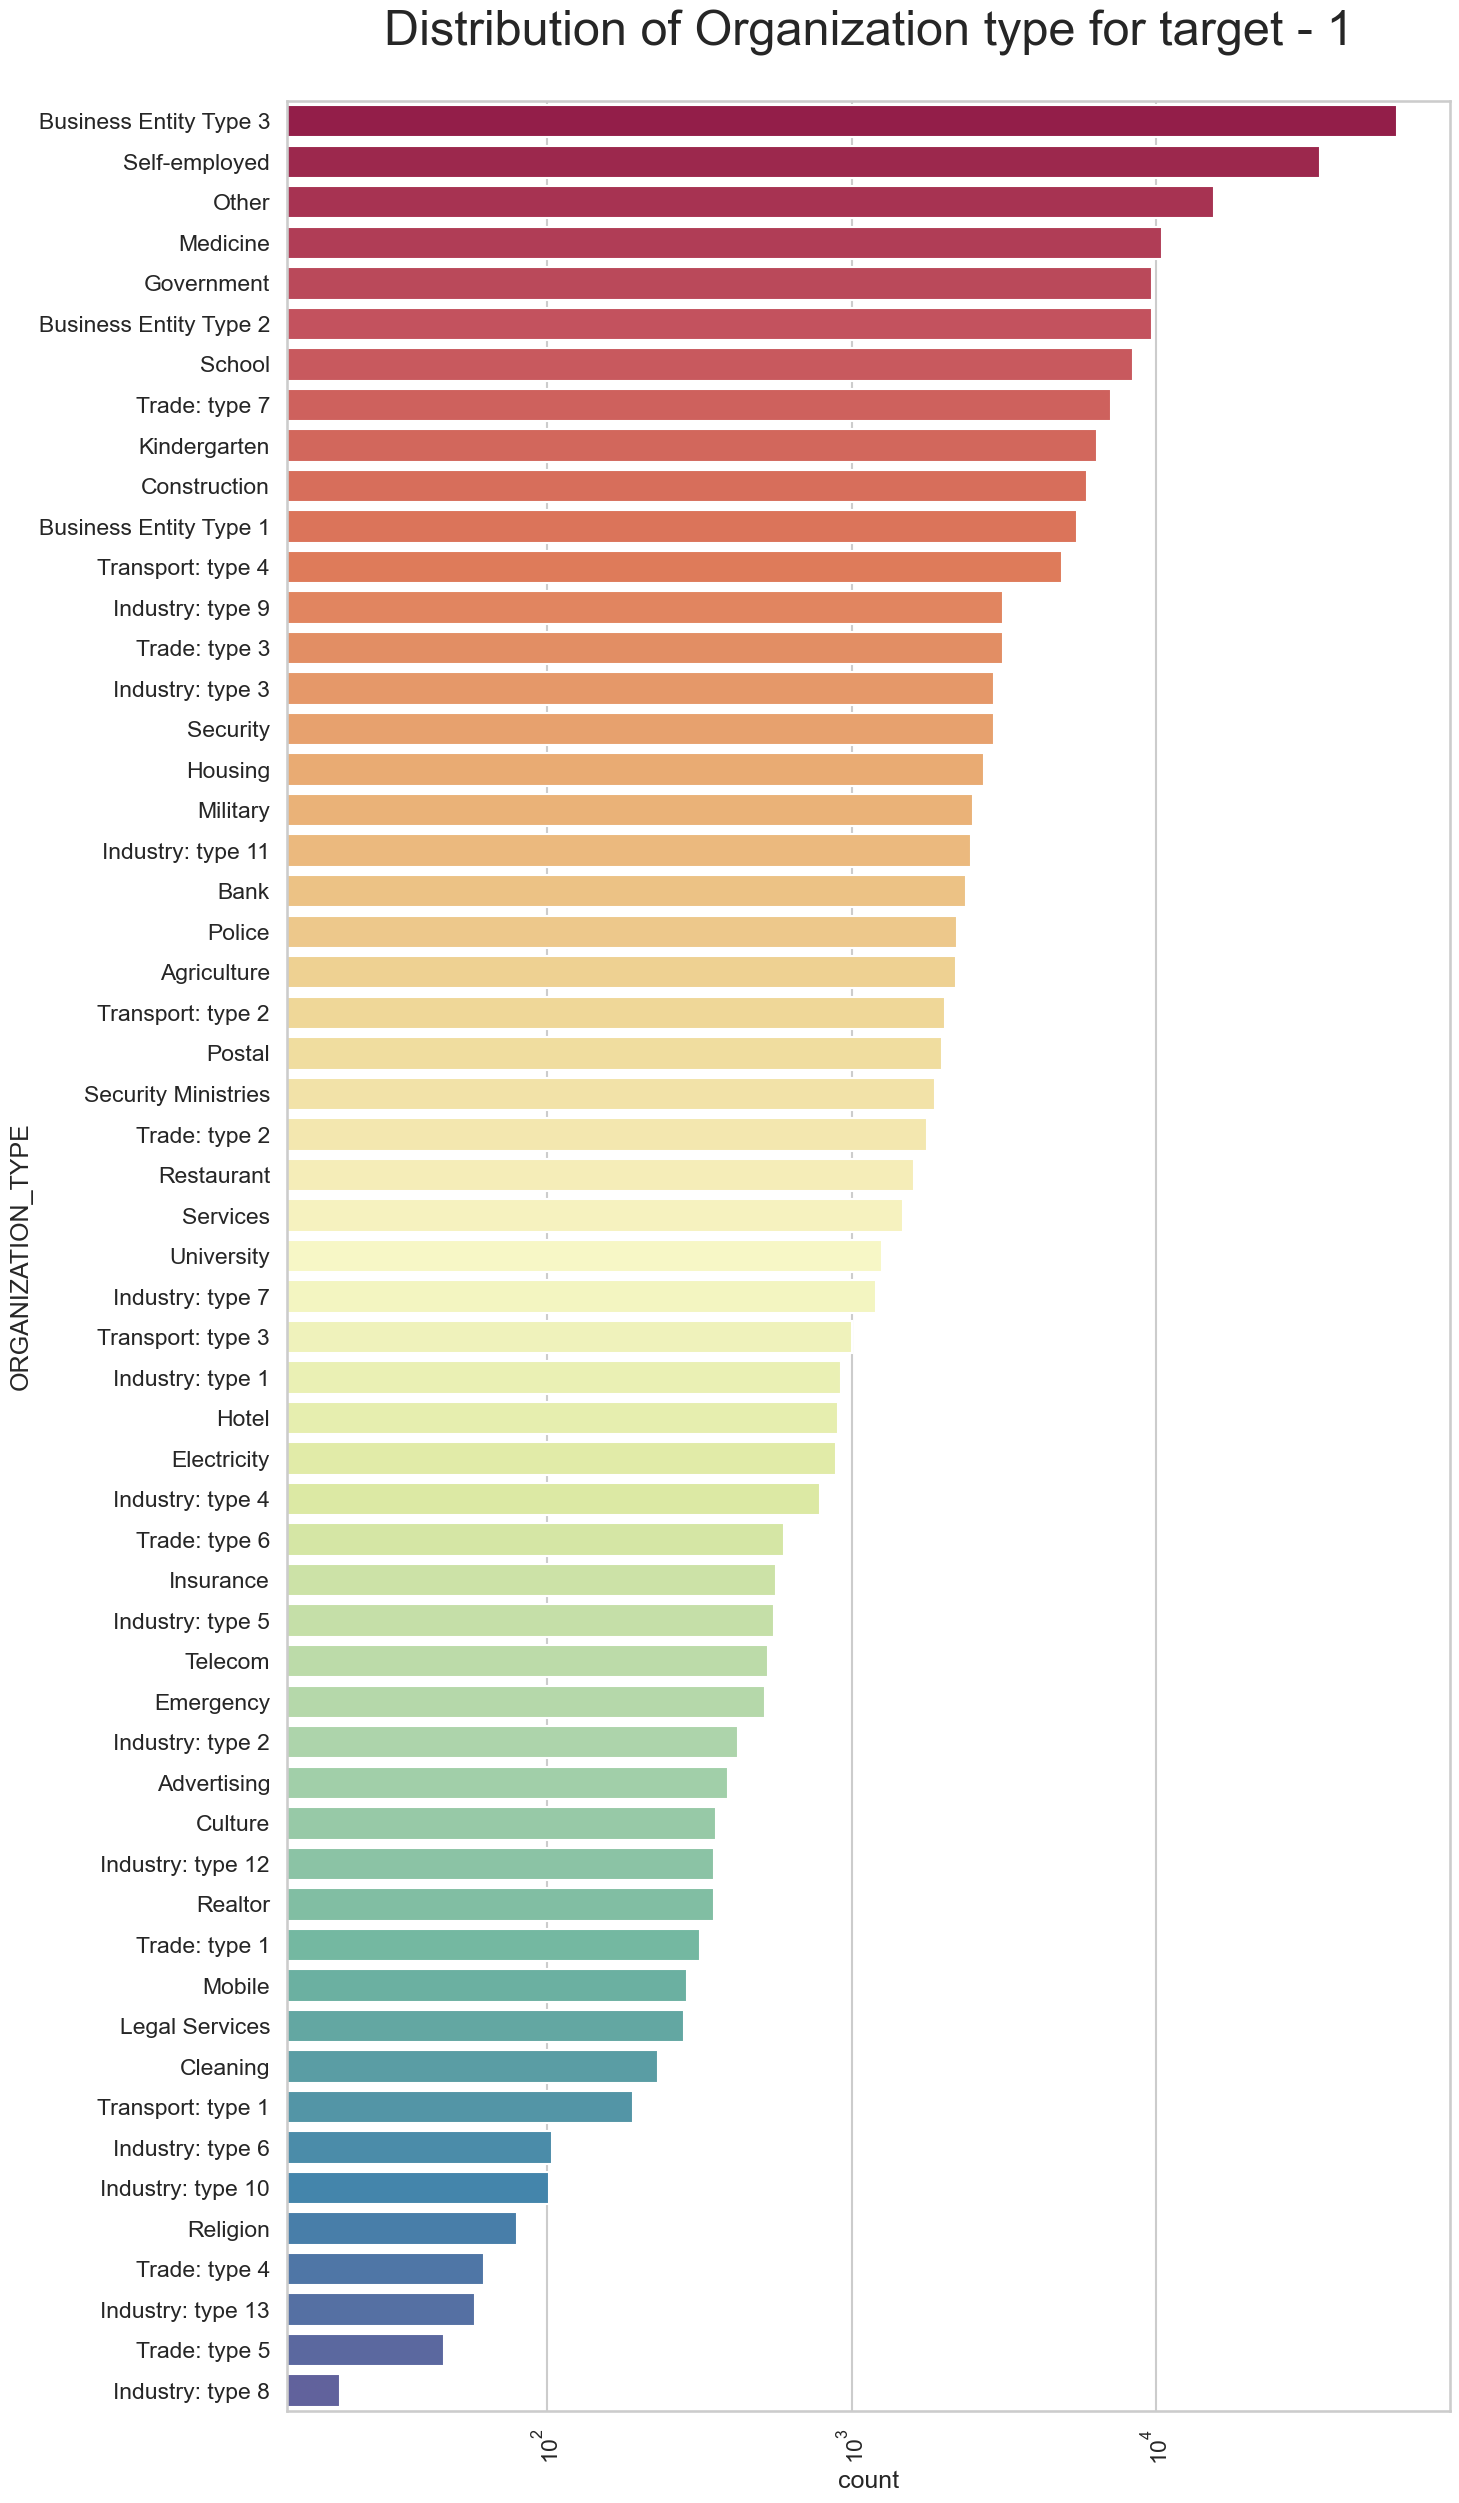

In [85]:
# Plott for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 35
plt.rcParams['axes.titlepad'] = 40

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='Spectral')

plt.show()

In [86]:
#### Key takeaways from the provided graph are as follows:

    #1. Prominent Organization Types: The graph indicates that clients who have applied for credits predominantly belong to organization types such as 'Business entity Type 3,' 'Self employed,' 'Other,' 'Medicine,' and 'Government.'
    #2. Limited Representation: Conversely, there is a lower representation of clients from organization types like 'Industry type 8,' 'type 6,' 'type 10,' 'religion and trade type 5,' and 'type 4.'
    #3. Consistency Across Targets: The distribution of clients based on organization types remains consistent between 'target = 0' and 'target = 1,' indicating that organization type is not a significant discriminator when considering the target variable.

In [87]:
# Searching for some correlation for numerical columns for both target 0 and 1 

target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [88]:
# Correlation for target 0

target0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.021950   -0.023652   
AMT_INCOME_TOTAL                -0.021950          1.000000    0.403876   
AMT_CREDIT                      -0.023652          0.403876    1.000000   
AMT_ANNUITY                     -0.010795          0.472204    0.826689   
REGION_POPULATION_RELATIVE      -0.030579          0.110074    0.060706   
DAYS_BIRTH                       0.266534         -0.054666   -0.169030   
DAYS_EMPLOYED                    0.030948         -0.060868   -0.104251   
DAYS_REGISTRATION                0.155518          0.040559   -0.015318   
DAYS_ID_PUBLISH                 -0.119164         -0.036702   -0.038197   
HOUR_APPR_PROCESS_START         -0.030162          0.073503    0.036923   
REG_REGION_NOT_LIVE_REGION      -0.022813          0.077634    0.015118   
REG_REGION_NOT_WORK_REGION      -0.015475          0.159962    0.041693   
LIVE_REGION_NOT_WORK_REGION     -0.005576          0.148281    0.045175   
REG_CITY_NOT_LIVE_CITY           0.002344         -0.001023   -0.040616   
REG_CITY_NOT_WORK_CITY           0.007487         -0.013856   -0.037000   
LIVE_CITY_NOT_WORK_CITY          0.013295         -0.004758   -0.011194   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                   -0.010795                   -0.030579   
AMT_INCOME_TOTAL                0.472204                    0.110074   
AMT_CREDIT                      0.826689                    0.060706   
AMT_ANNUITY                     1.000000                    0.064328   
REGION_POPULATION_RELATIVE      0.064328                    1.000000   
DAYS_BIRTH                     -0.100287                   -0.041663   
DAYS_EMPLOYED                  -0.074643                    0.000900   
DAYS_REGISTRATION               0.010712                   -0.042400   
DAYS_ID_PUBLISH                -0.027354                   -0.010299   
HOUR_APPR_PROCESS_START         0.032953                    0.133213   
REG_REGION_NOT_LIVE_REGION      0.033435                   -0.025292   
REG_REGION_NOT_WORK_REGION      0.070841                    0.032446   
LIVE_REGION_NOT_WORK_REGION     0.069051                    0.056814   
REG_CITY_NOT_LIVE_CITY         -0.019954                   -0.049779   
REG_CITY_NOT_WORK_CITY         -0.024085                   -0.034808   
LIVE_CITY_NOT_WORK_CITY        -0.008087                   -0.007332   

                             DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                   0.266534       0.030948           0.155518   
AMT_INCOME_TOTAL              -0.054666      -0.060868           0.040559   
AMT_CREDIT                    -0.169030      -0.104251          -0.015318   
AMT_ANNUITY                   -0.100287      -0.074643           0.010712   
REGION_POPULATION_RELATIVE    -0.041663       0.000900          -0.042400   
DAYS_BIRTH                     1.000000       0.307787           0.265449   
DAYS_EMPLOYED                  0.307787       1.000000           0.126708   
DAYS_REGISTRATION              0.265449       0.126708           1.000000   
DAYS_ID_PUBLISH                0.083331       0.106823           0.036788   
HOUR_APPR_PROCESS_START        0.051299       0.026444          -0.029553   
REG_REGION_NOT_LIVE_REGION     0.058627       0.065435           0.017715   
REG_REGION_NOT_WORK_REGION     0.038104       0.086966           0.015092   
LIVE_REGION_NOT_WORK_REGION    0.012789       0.063533           0.007716   
REG_CITY_NOT_LIVE_CITY         0.167477       0.118224           0.038064   
REG_CITY_NOT_WORK_CITY         0.111539       0.125954           0.047339   
LIVE_CITY_NOT_WORK_CITY        0.029007       0.069567           0.027231   

                             DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                       -0.119164                -0.030162   
AMT_INCOME_TOTAL                   -0.036702                 0.073503   

In [89]:
# Correlation for target 1

target1

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.039123    0.000427   
AMT_INCOME_TOTAL                -0.039123          1.000000    0.364559   
AMT_CREDIT                       0.000427          0.364559    1.000000   
AMT_ANNUITY                      0.015133          0.428947    0.812093   
REGION_POPULATION_RELATIVE      -0.029682          0.058005    0.043545   
DAYS_BIRTH                       0.175025         -0.103026   -0.200718   
DAYS_EMPLOYED                    0.006823         -0.053798   -0.107605   
DAYS_REGISTRATION                0.110854          0.011378   -0.021973   
DAYS_ID_PUBLISH                 -0.091042         -0.051113   -0.065143   
HOUR_APPR_PROCESS_START         -0.040338          0.078779    0.024616   
REG_REGION_NOT_LIVE_REGION      -0.035213          0.075615    0.015043   
REG_REGION_NOT_WORK_REGION      -0.040853          0.156374    0.032536   
LIVE_REGION_NOT_WORK_REGION     -0.027993          0.145982    0.034861   
REG_CITY_NOT_LIVE_CITY          -0.016072         -0.003813   -0.030974   
REG_CITY_NOT_WORK_CITY          -0.005444         -0.006241   -0.032882   
LIVE_CITY_NOT_WORK_CITY          0.009557          0.004230   -0.012465   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                    0.015133                   -0.029682   
AMT_INCOME_TOTAL                0.428947                    0.058005   
AMT_CREDIT                      0.812093                    0.043545   
AMT_ANNUITY                     1.000000                    0.028666   
REGION_POPULATION_RELATIVE      0.028666                    1.000000   
DAYS_BIRTH                     -0.100200                   -0.044444   
DAYS_EMPLOYED                  -0.060193                   -0.015246   
DAYS_REGISTRATION               0.019762                   -0.033490   
DAYS_ID_PUBLISH                -0.044128                   -0.017779   
HOUR_APPR_PROCESS_START         0.021129                    0.109400   
REG_REGION_NOT_LIVE_REGION      0.029646                   -0.032702   
REG_REGION_NOT_WORK_REGION      0.060363                   -0.008160   
LIVE_REGION_NOT_WORK_REGION     0.059724                    0.012602   
REG_CITY_NOT_LIVE_CITY         -0.011744                   -0.057239   
REG_CITY_NOT_WORK_CITY         -0.015938                   -0.044761   
LIVE_CITY_NOT_WORK_CITY        -0.003012                   -0.014753   

                             DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                   0.175025       0.006823           0.110854   
AMT_INCOME_TOTAL              -0.103026      -0.053798           0.011378   
AMT_CREDIT                    -0.200718      -0.107605          -0.021973   
AMT_ANNUITY                   -0.100200      -0.060193           0.019762   
REGION_POPULATION_RELATIVE    -0.044444      -0.015246          -0.033490   
DAYS_BIRTH                     1.000000       0.256870           0.192350   
DAYS_EMPLOYED                  0.256870       1.000000           0.086286   
DAYS_REGISTRATION              0.192350       0.086286           1.000000   
DAYS_ID_PUBLISH                0.146246       0.104244           0.061563   
HOUR_APPR_PROCESS_START        0.041994       0.010328          -0.044753   
REG_REGION_NOT_LIVE_REGION     0.046320       0.069566           0.006362   
REG_REGION_NOT_WORK_REGION     0.022208       0.082264           0.000896   
LIVE_REGION_NOT_WORK_REGION    0.000356       0.056081          -0.001416   
REG_CITY_NOT_LIVE_CITY         0.145884       0.118869           0.015831   
REG_CITY_NOT_WORK_CITY         0.096181       0.139863           0.039204   
LIVE_CITY_NOT_WORK_CITY        0.009633       0.069316           0.026105   

                             DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                       -0.091042                -0.040338   
AMT_INCOME_TOTAL                   -0.051113                 0.078779   

In [109]:
# plotting the above correlation with heat map 


def targets_corr(data,title):
    plt.figure(figsize=(20, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=True)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

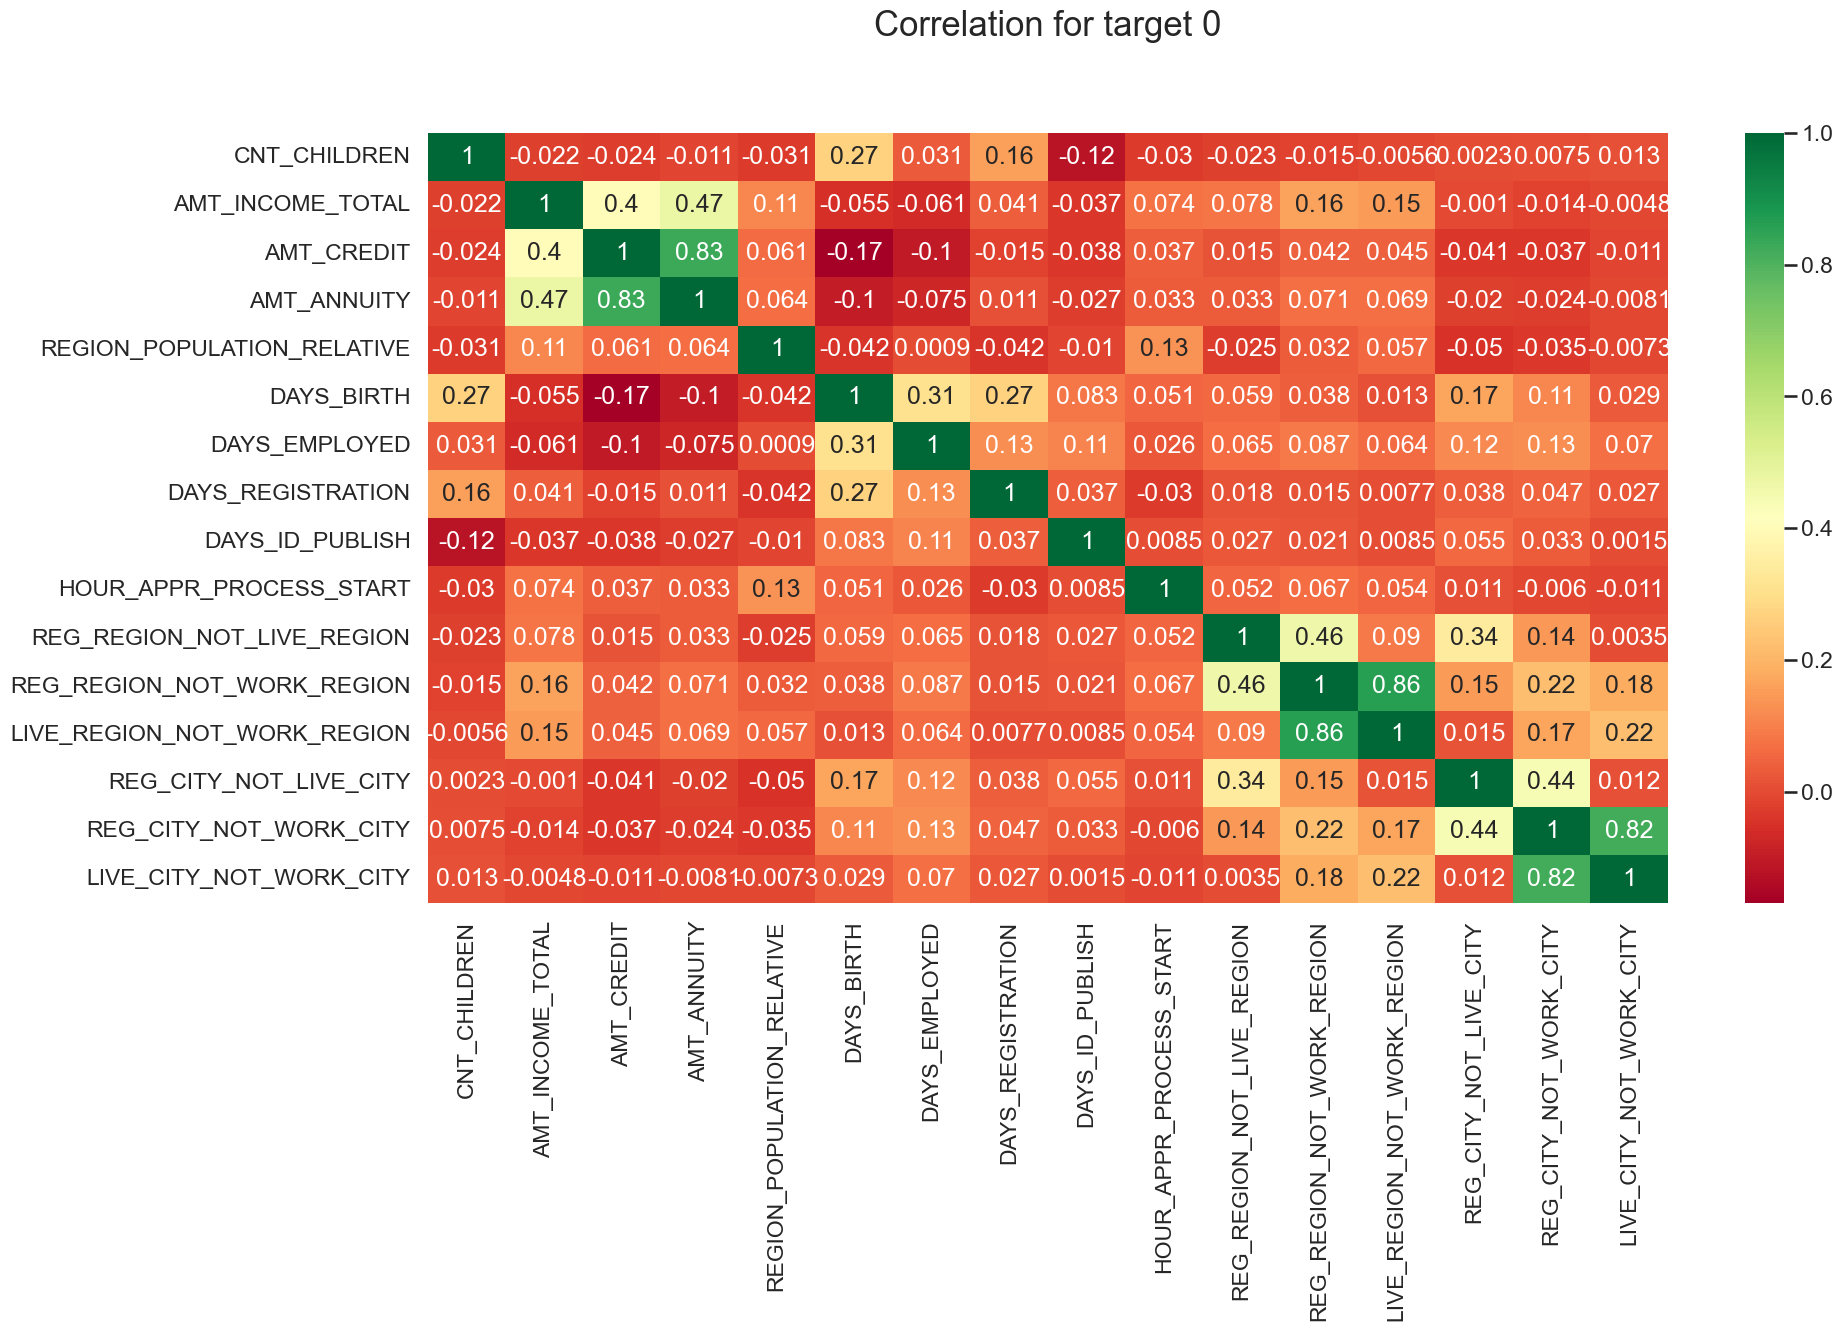

In [110]:
# For Target 0

targets_corr(data=target0,title='Correlation for target 0')

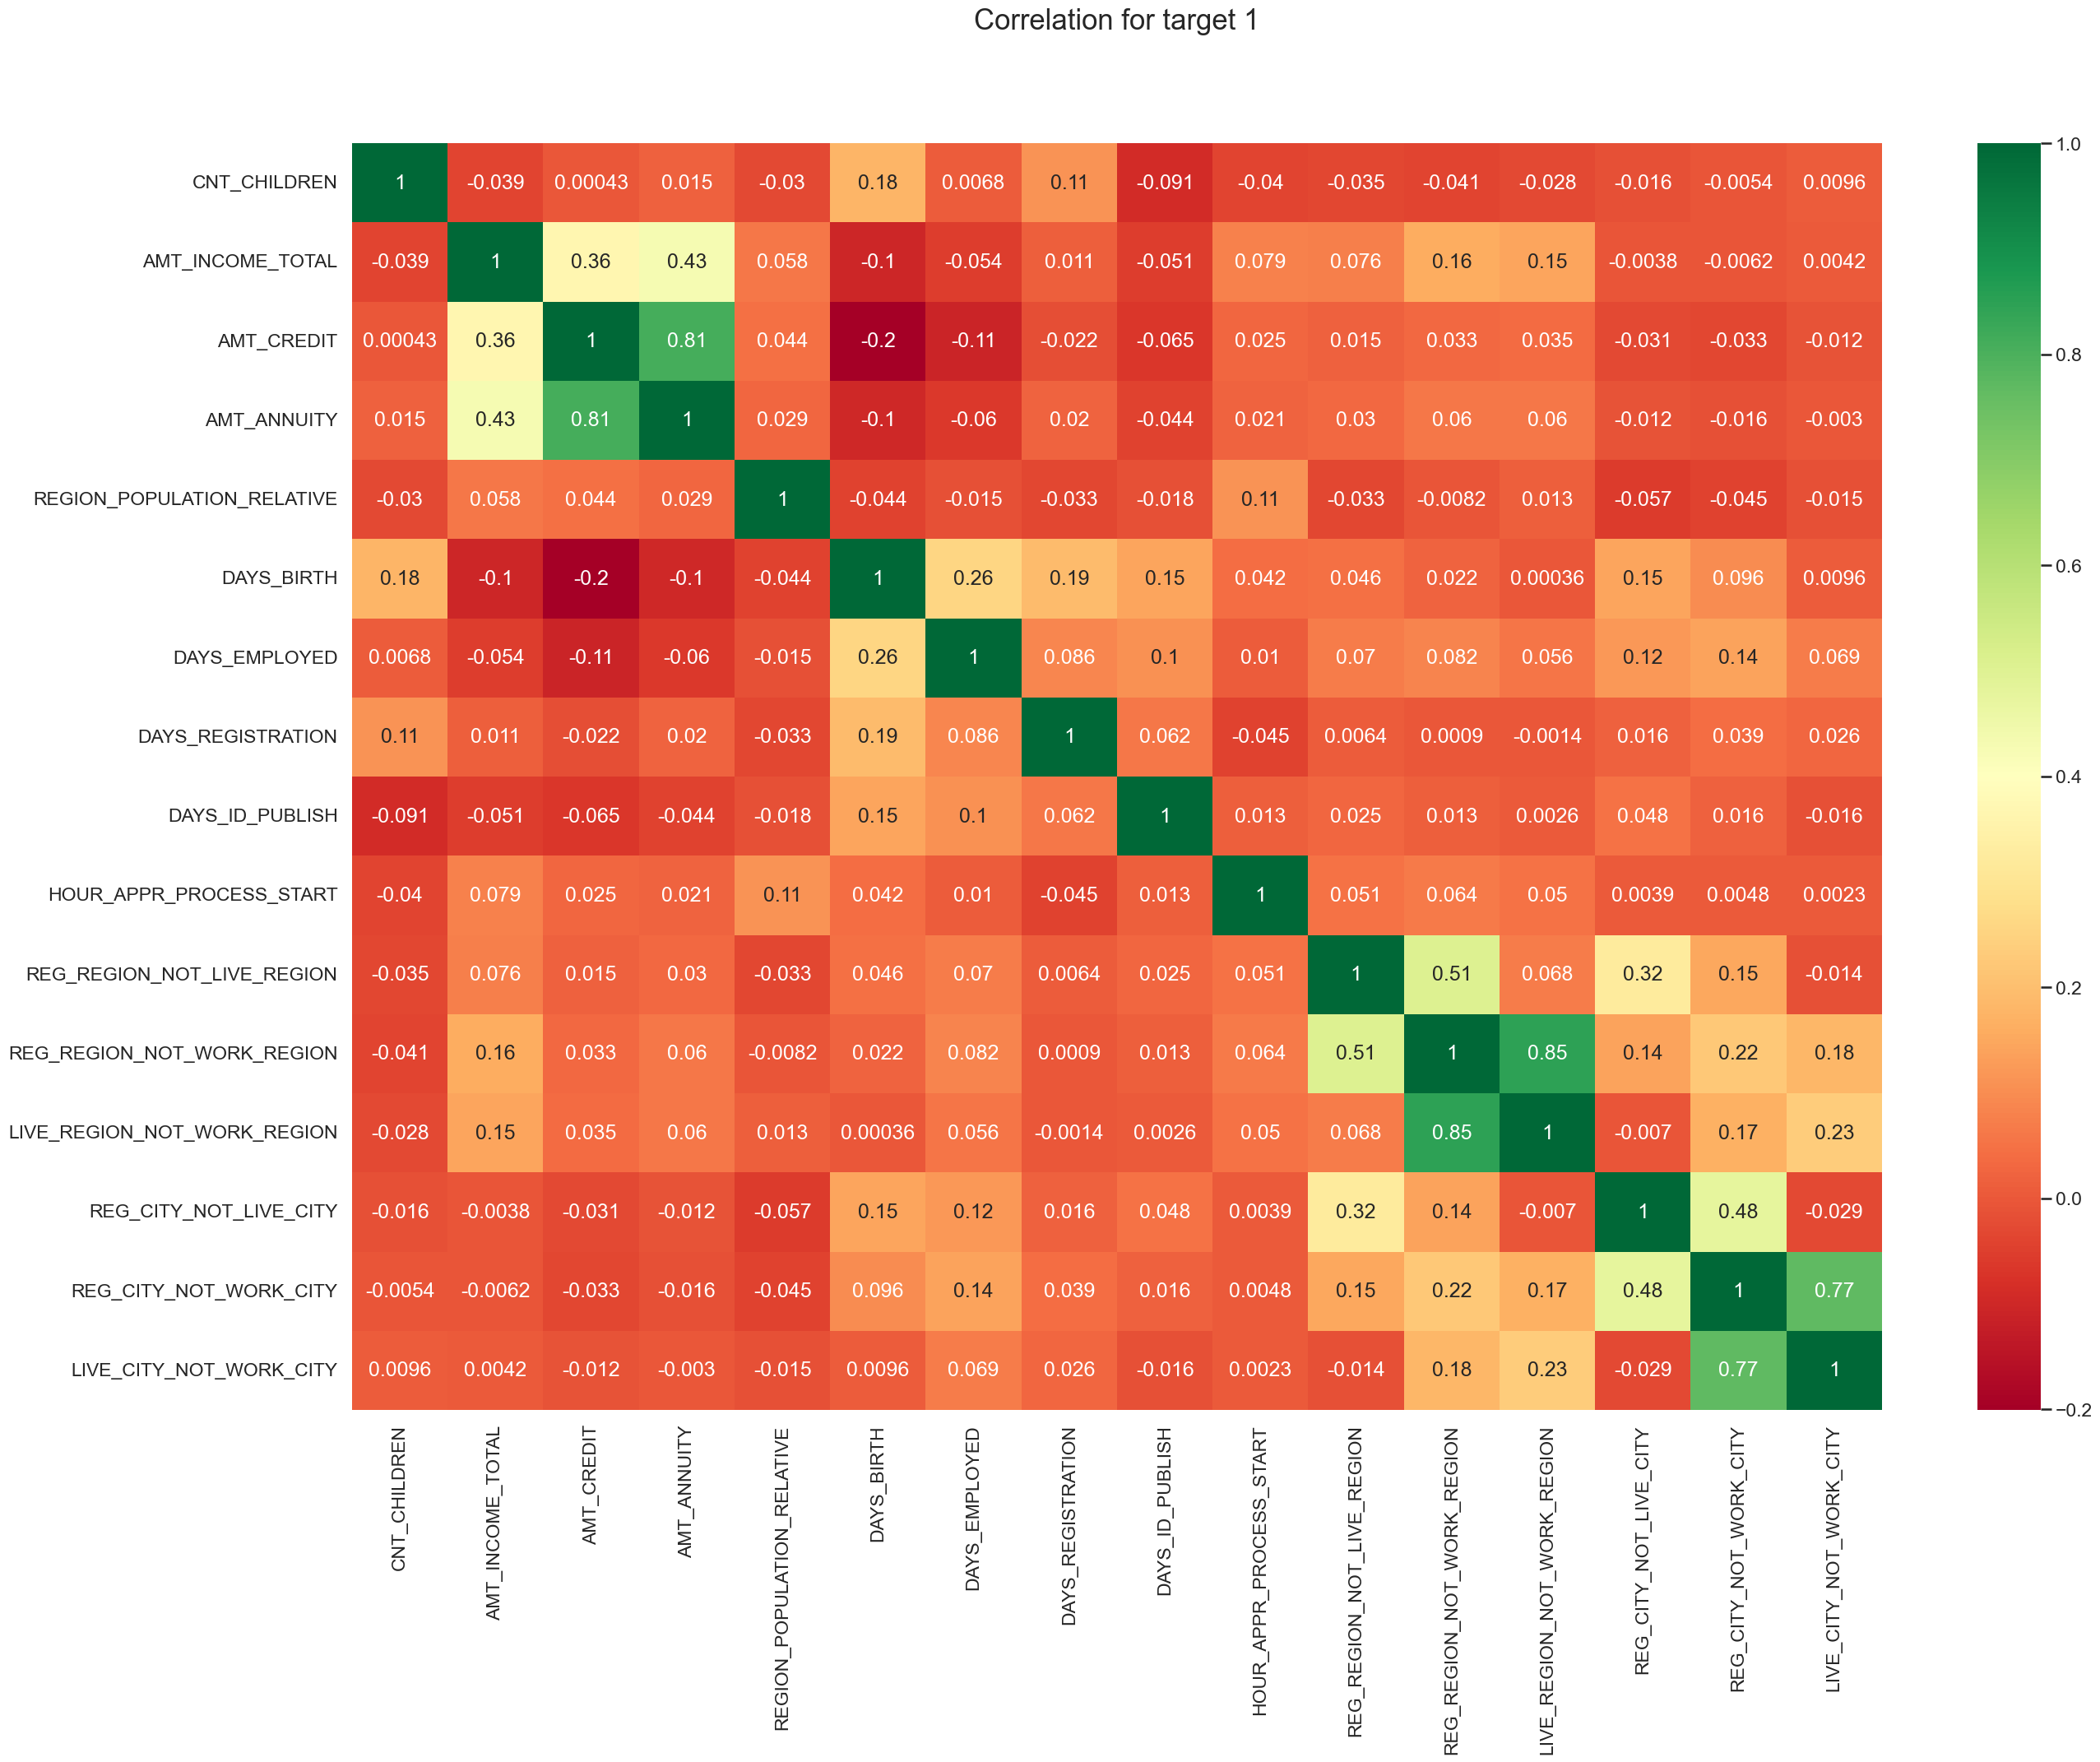

In [102]:
# For Target 1

targets_corr(data=target1,title='Correlation for target 1')

In [103]:
#### The heatmap analysis for 'Target 1' exhibits substantial similarity to that of 'Target 0,' yet a few distinctions are discernible.

     #1. Address Mismatch and Children: Notably, individuals whose permanent address does not align with their contact address tend to have fewer children, suggesting an inverse relationship between address inconsistency and the number of children.
     #2. Address Mismatch and Work Address: Similarly, there is a parallel inverse proportion between individuals with non-matching permanent and work addresses, and the number of children they have.

In [111]:
#### Univariate analysis for variables

# # Box plotting for univariate variables analysis

def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target1_df, x=col,orient='v')
    plt.show()

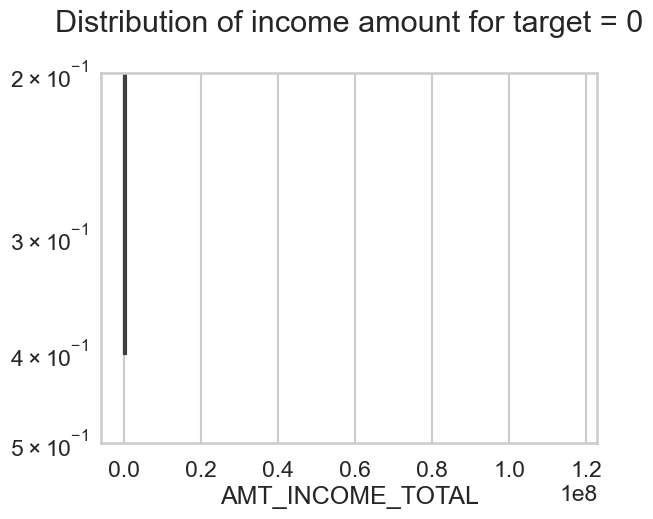

In [113]:
# For Target 0 - Find if any outliers

# Distribution of income amount

univariate_numerical(data=target0_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount for target = 0')

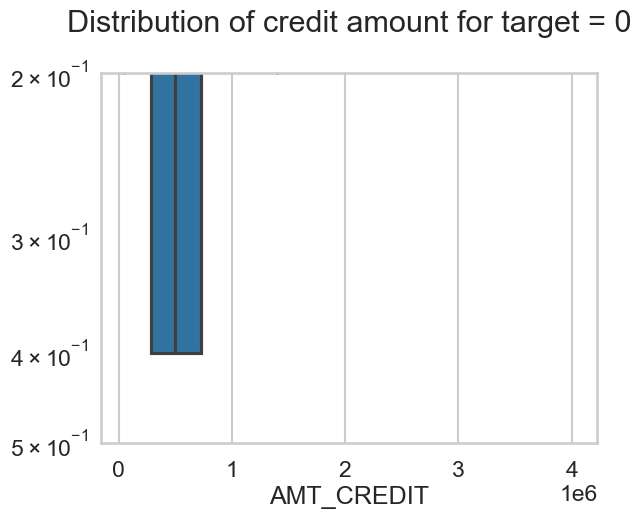

In [114]:
# Disrtibution of credit amount

univariate_numerical(data=target0_df,col='AMT_CREDIT',title='Distribution of credit amount for target = 0')

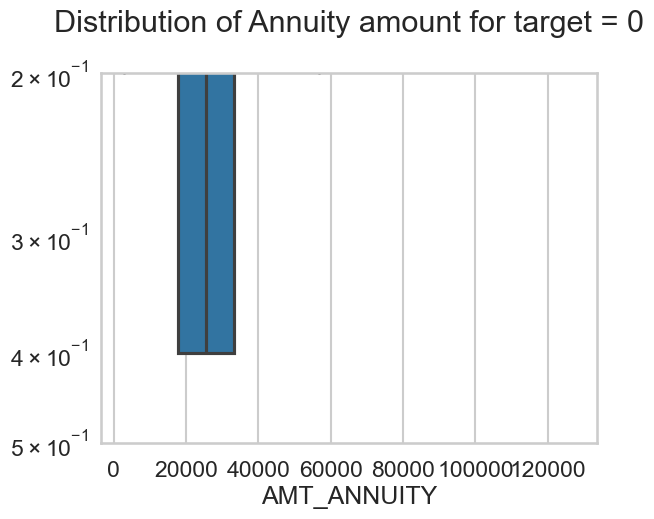

In [115]:
# Distribution of anuuity amount

univariate_numerical(data=target0_df,col='AMT_ANNUITY',title='Distribution of Annuity amount for target = 0')

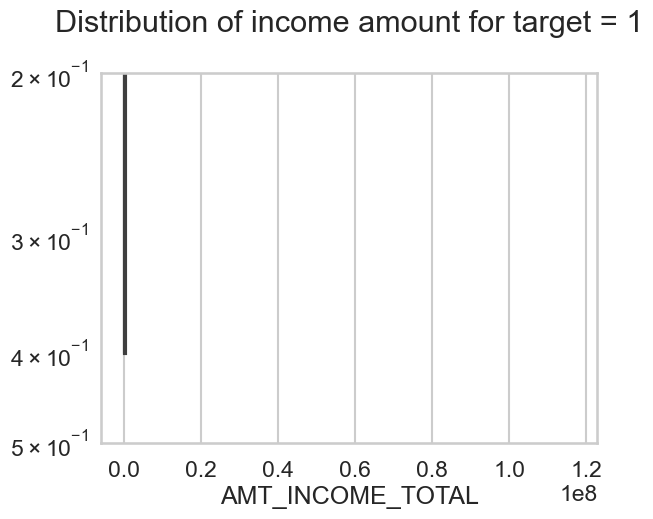

In [116]:
#### For Target 1 - Finding any outliers

# Distribution of income amount

univariate_numerical(data=target1_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount for target = 1')

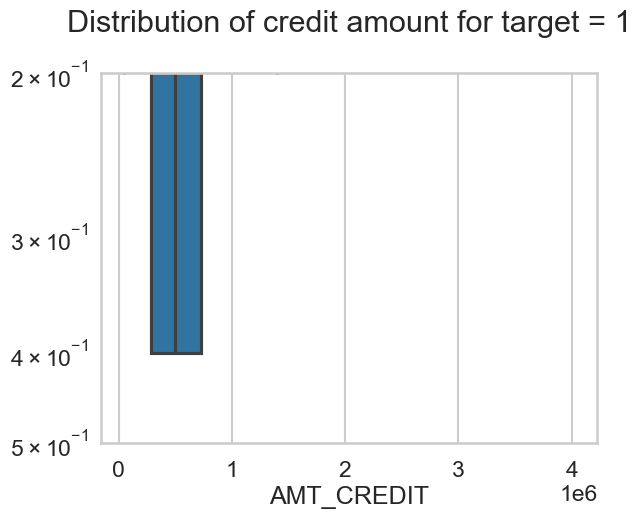

In [117]:
# Distribution of credit amount

univariate_numerical(data=target1_df,col='AMT_CREDIT',title='Distribution of credit amount for target = 1')

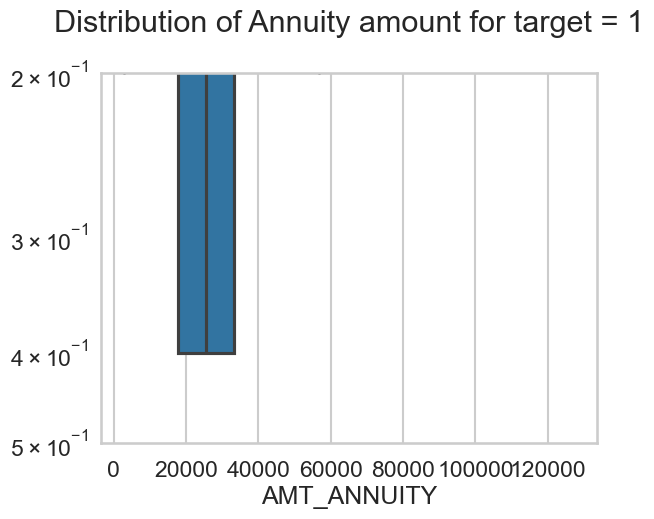

In [118]:
# Distribution of Annuity amount

univariate_numerical(data=target1_df,col='AMT_ANNUITY',title='Distribution of Annuity amount for target = 1')

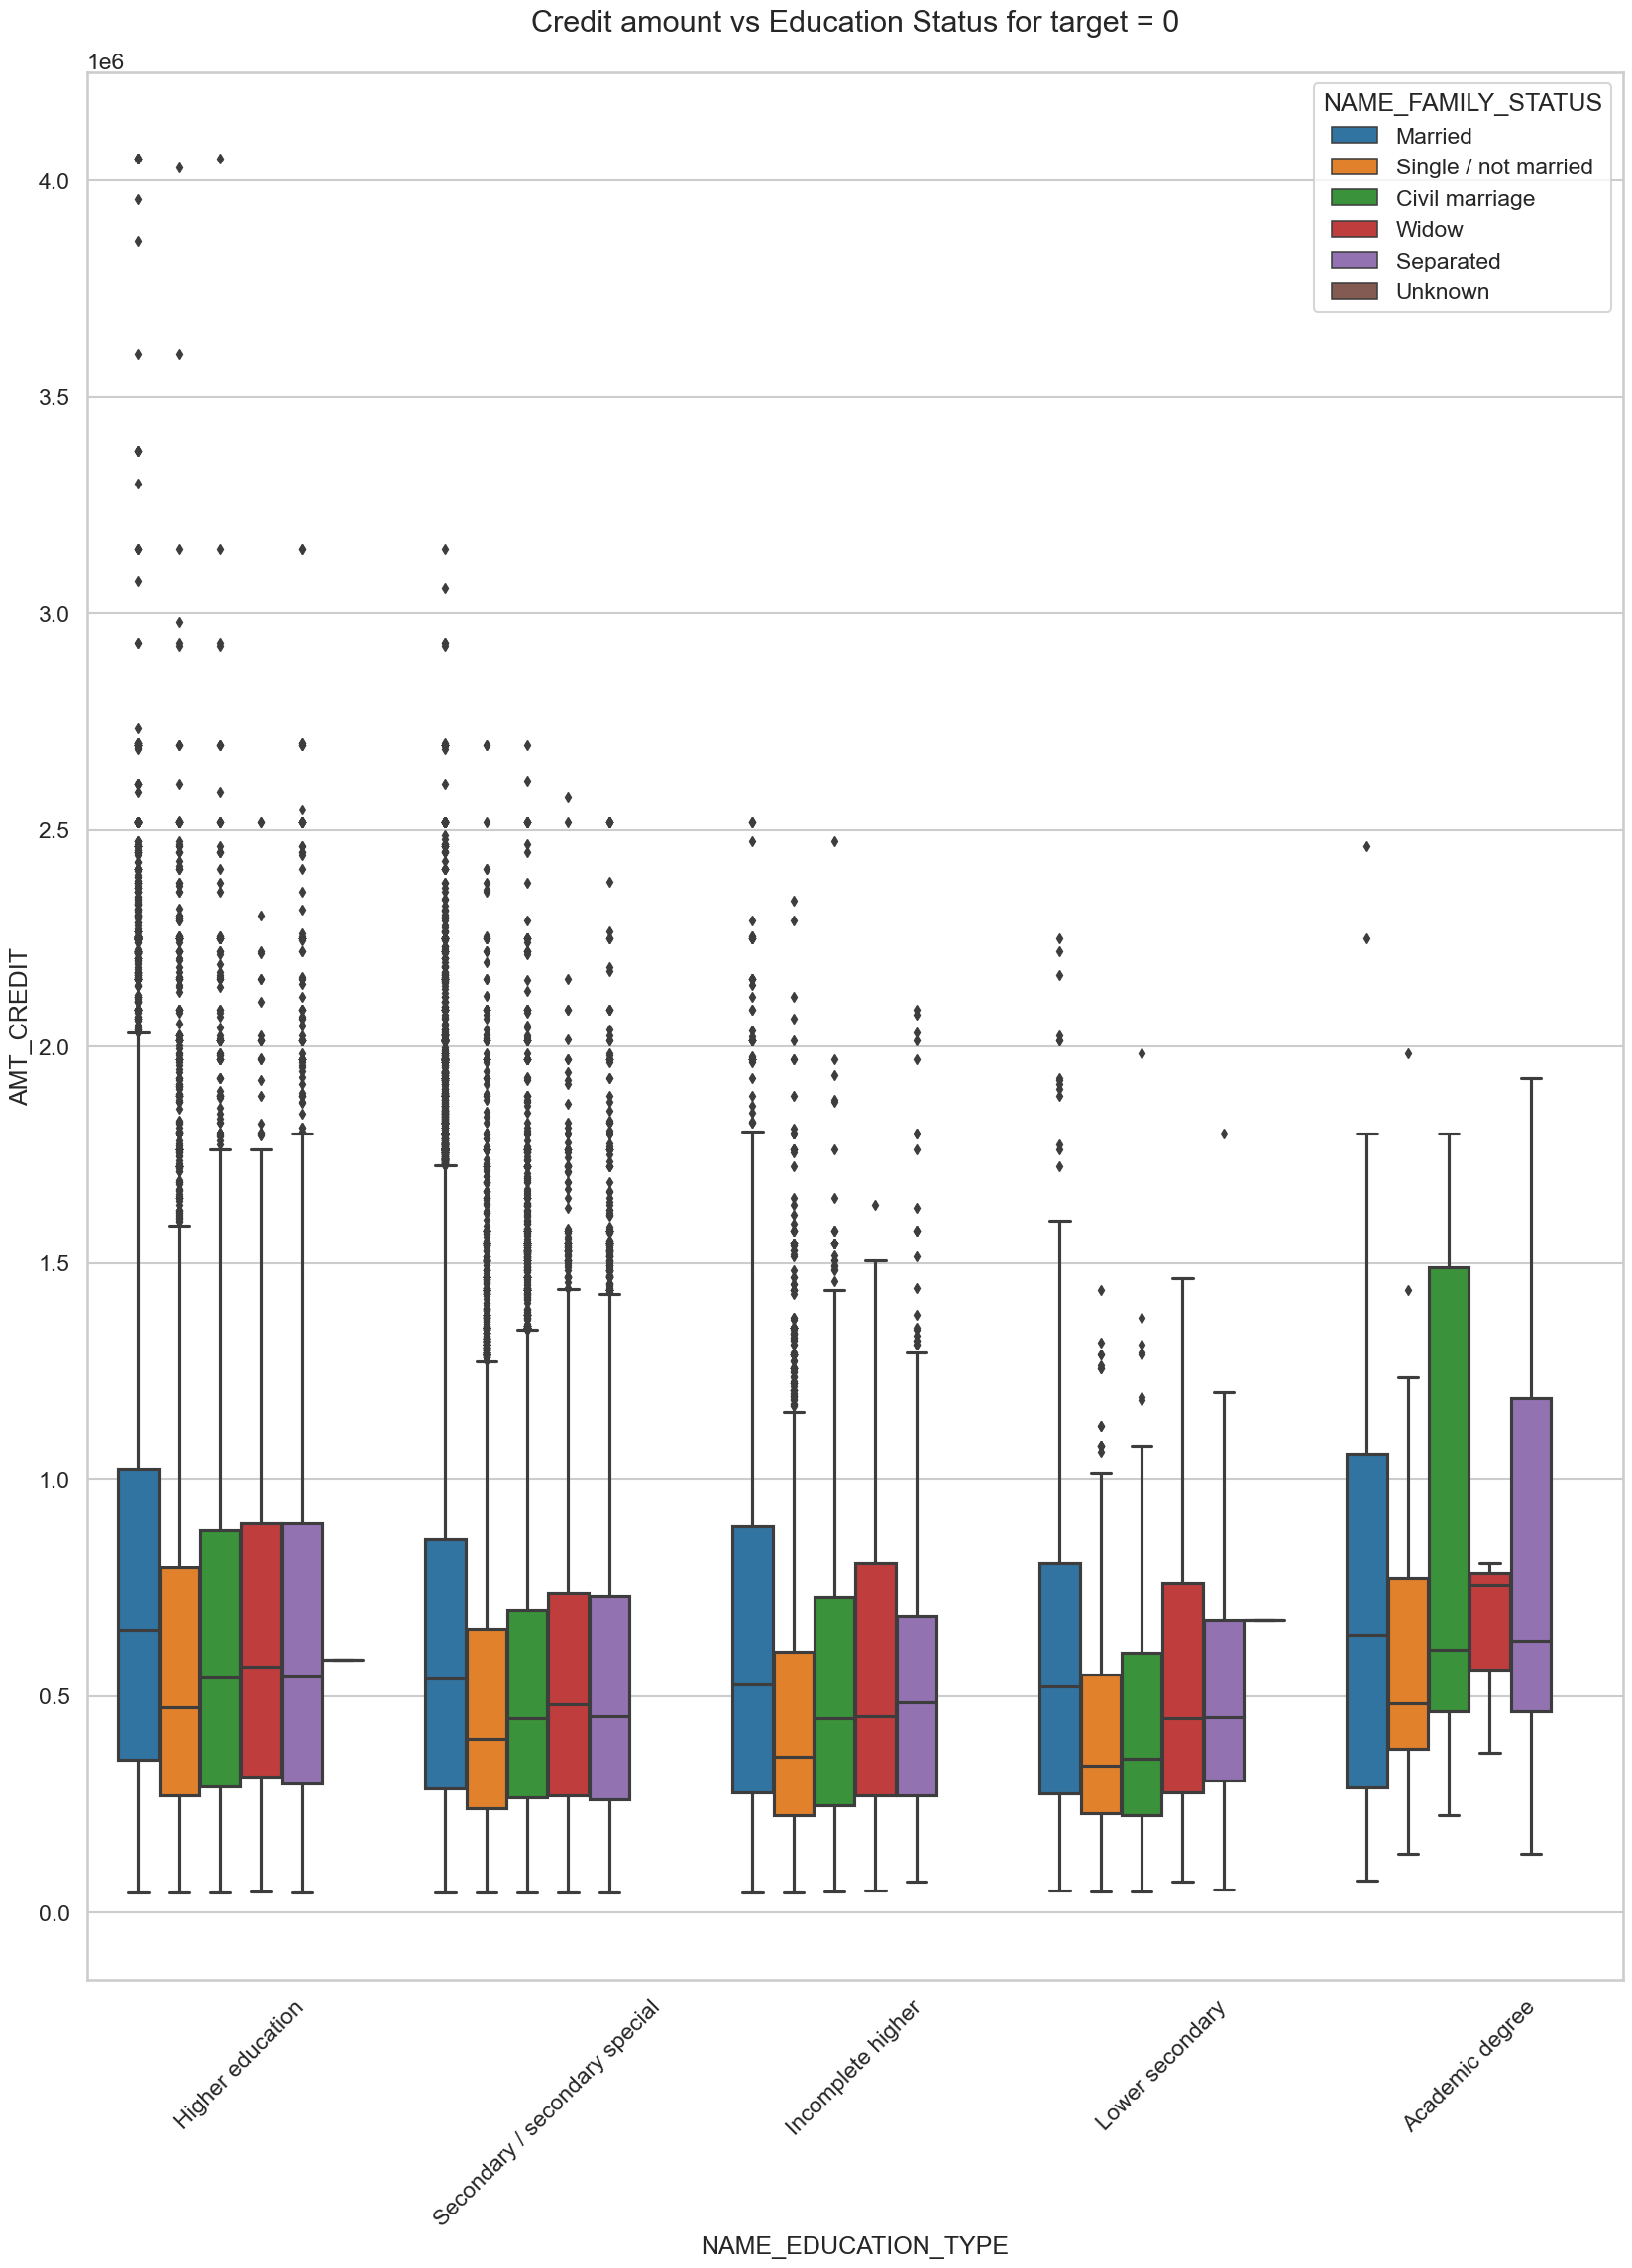

In [120]:
#####     Bivariate analysis for numerical variables

# For Target 0

# Box plot for Credit amount

plt.figure(figsize=(20,25))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for target = 0')
plt.show()

In [121]:
####    Key insights derived from the presented box plot analysis are as follows:

    #1. Family Status and Education: Individuals with family statuses labeled as 'civil marriage,' 'marriage,' and 'separated,' who possess an 'Academic degree' education level, demonstrate a higher count of credits compared to other categories.
    #2. Education and Outliers: Notably, 'Higher education' among individuals with family statuses of 'marriage,' 'single,' and 'civil marriage' exhibits a higher frequency of outliers in credit distribution. This suggests potential variations or anomalies within this subgroup.
    #3. Civil Marriage and Academic Degree: Specifically, the combination of 'civil marriage' within the 'Academic degree' category stands out with a significant concentration of credits in the third quartile.

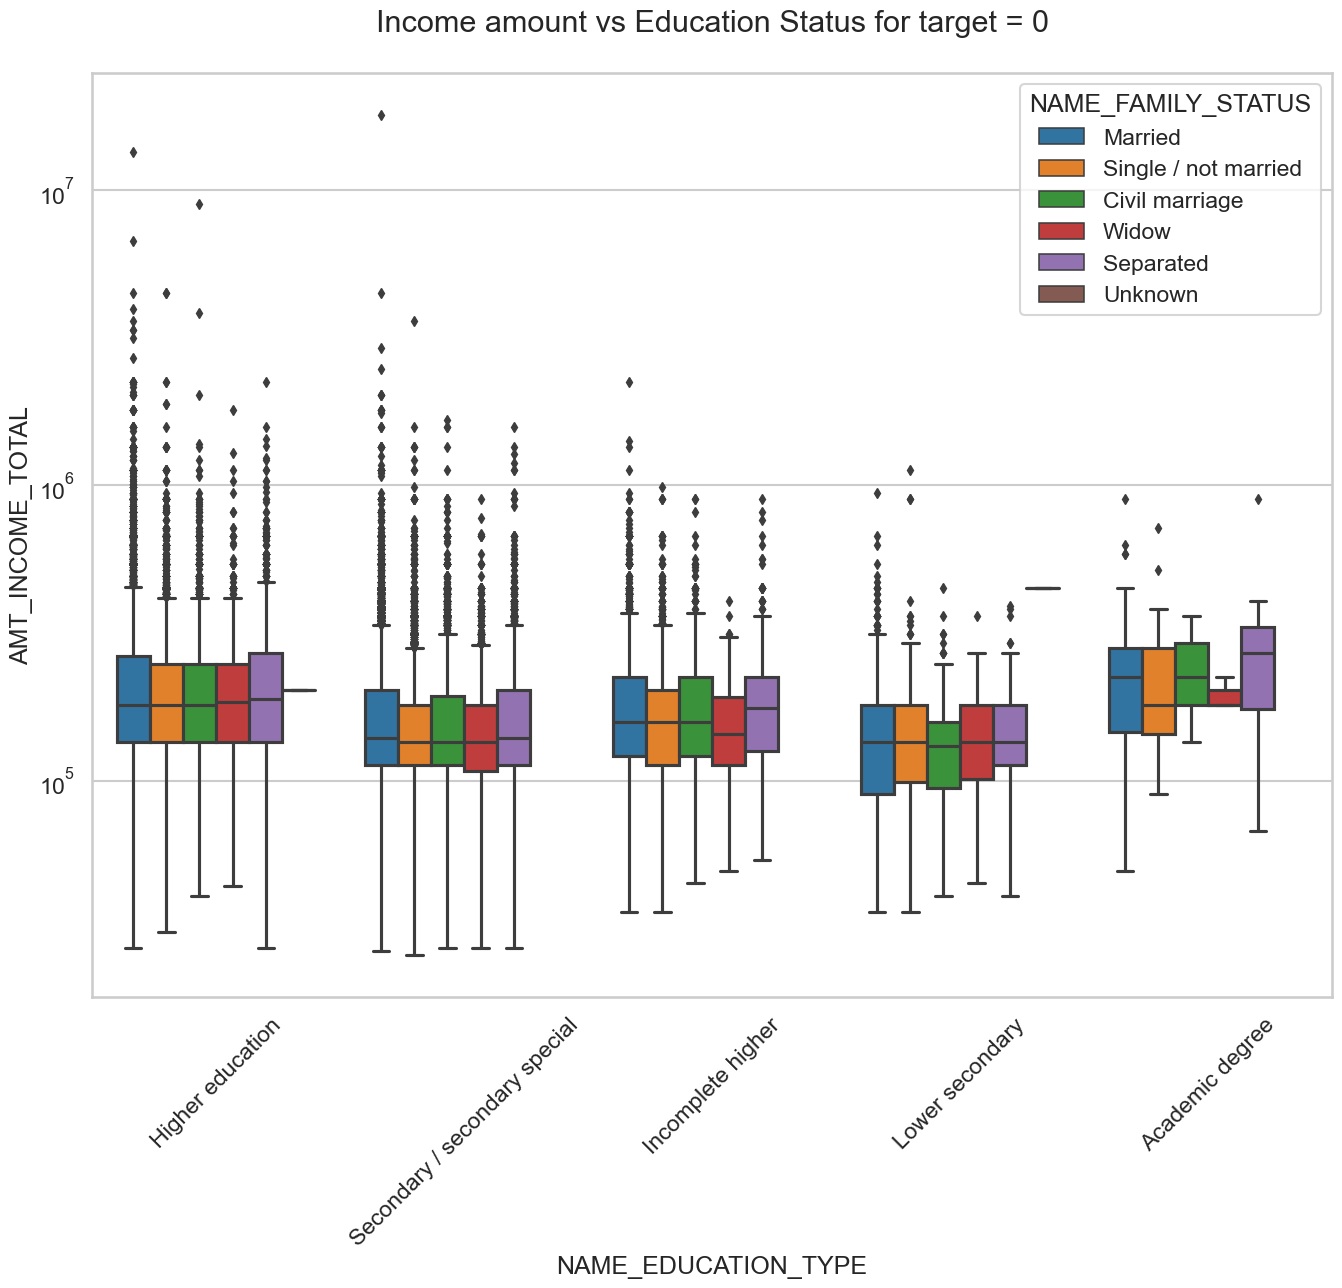

In [122]:
                                        # Box plot for Income amount 

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for target = 0')
plt.show()

In [123]:
####     Key insights extracted from the provided box plot analysis for the 'Higher education' category are as follows:

    #1. Income and Family Status: For individuals with 'Higher education,' the income amounts are notably consistent across different family statuses. This suggests that education level is a stronger determinant of income than family status within this category.
    #2. Outliers: The presence of numerous outliers in the 'Higher education' group indicates potential variations or anomalies in income within this education level. These outliers might reflect exceptional cases with significantly higher or lower incomes.
    #3. Comparison with Academic Degree: Individuals with 'Academic degree' education show fewer outliers compared to 'Higher education.' However, their income amounts tend to be slightly higher.
    #4. Lower Secondary Education and Civil Marriage: Individuals with 'Lower secondary education' and a family status of 'civil marriage' demonstrate relatively lower income amounts compared to other combinations of education and family status.

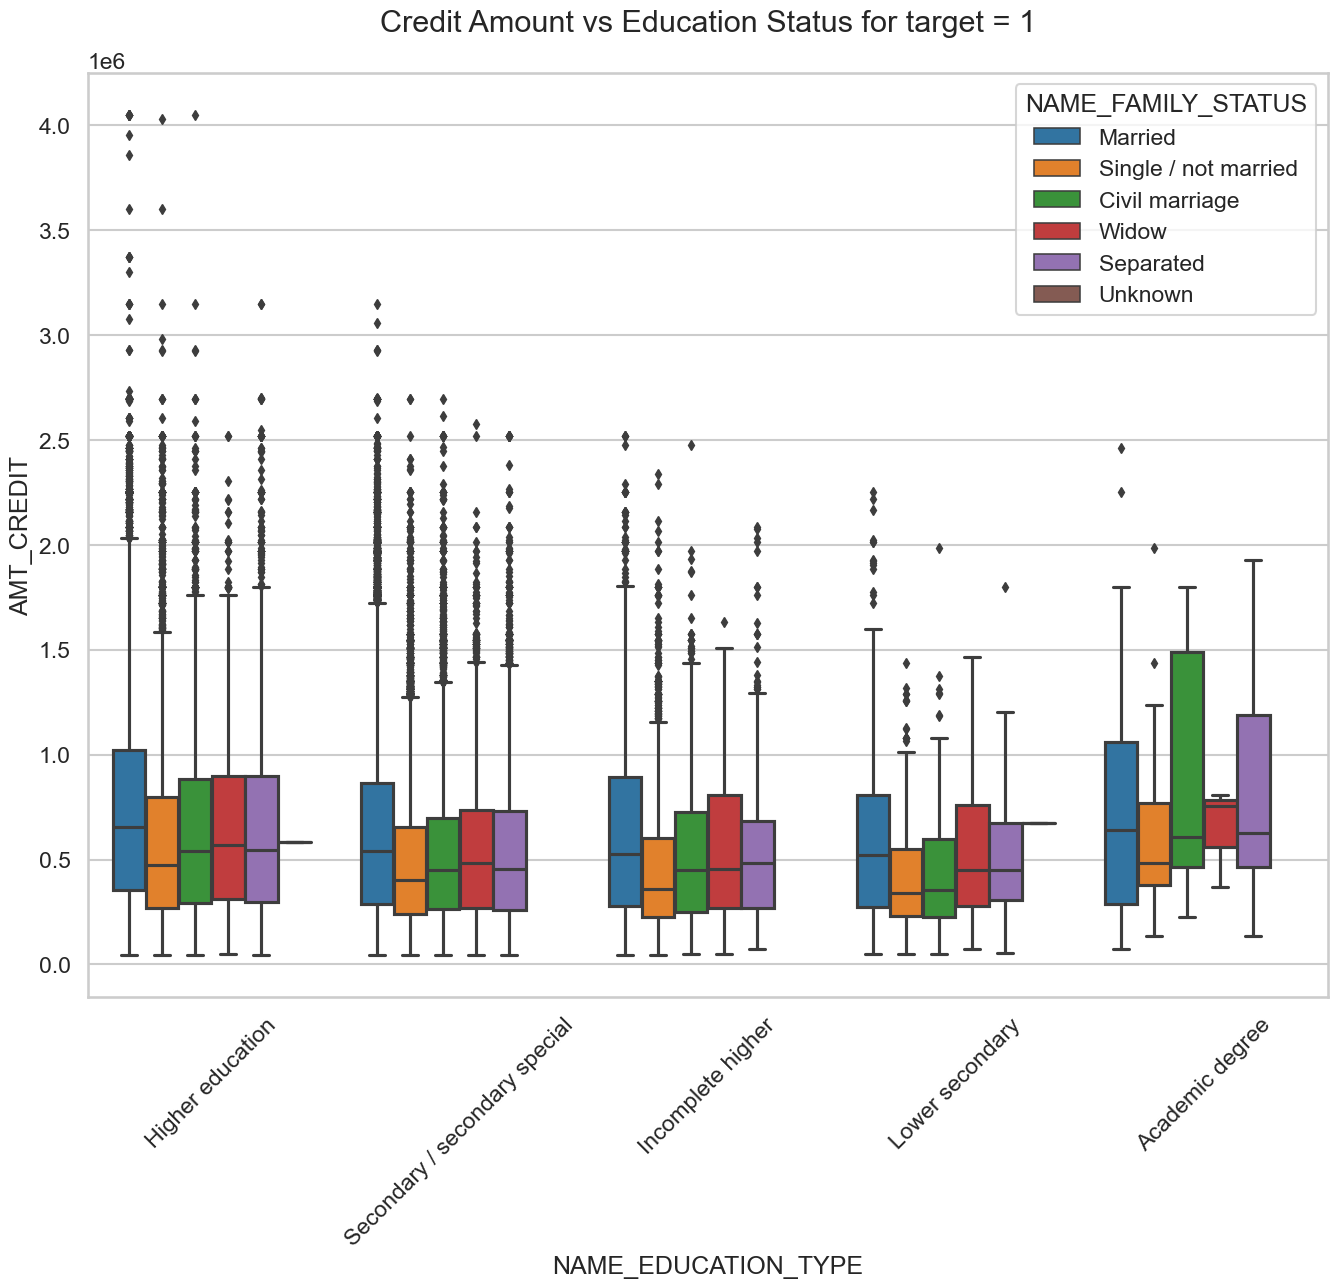

In [124]:
#######      For Target 1

                                    #Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status for target = 1')
plt.show()

In [125]:
####     The box plot analysis for 'Target = 1' appears to exhibit similarities to 'Target = 0.'

    #1. Family Status and Education: Similar to 'Target = 0,' individuals with family statuses 'civil marriage,' 'marriage,' and 'separated,' coupled with an 'Academic degree' education, tend to have a higher count of credits compared to other categories.
    #2. Outliers and Education: 'Higher education' and 'Secondary' education levels contain a significant number of outliers, indicating potential data anomalies or deviations from the norm in these categories.
    #3. Academic Degree and Civil Marriage: As observed in 'Target = 0,' the combination of 'civil marriage' within the 'Academic degree' category demonstrates a notable concentration of credits in the third quartile.

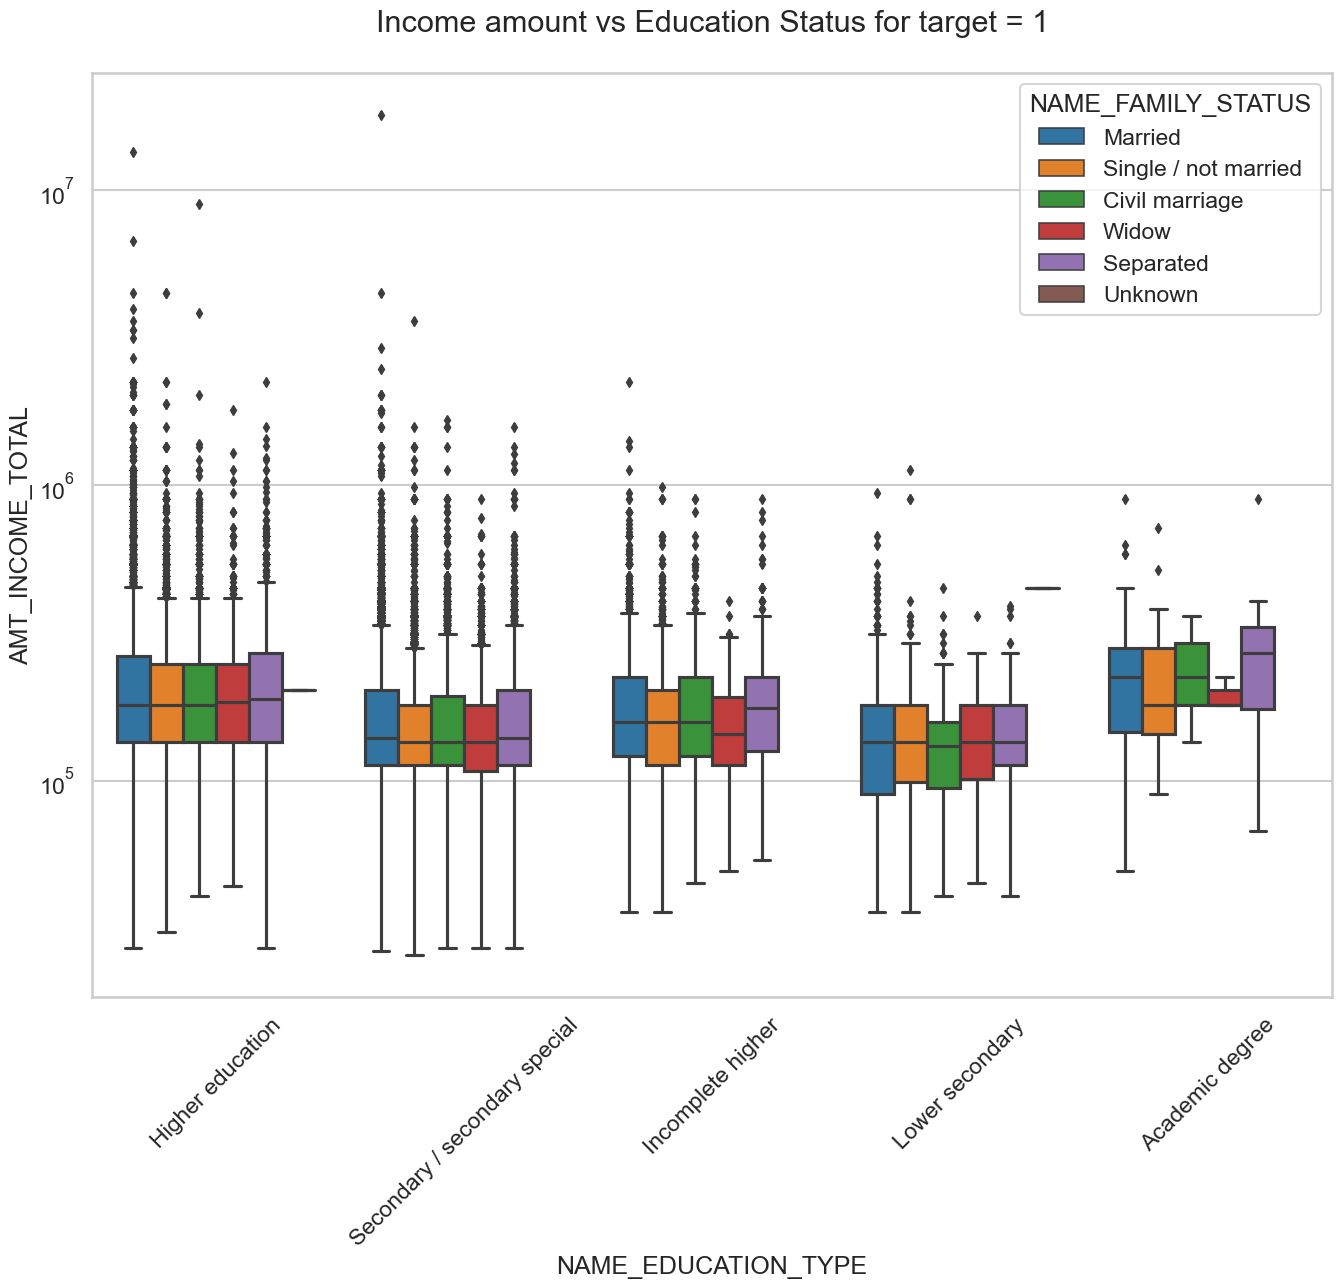

In [126]:
                                    # Box plotting for Income amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for target = 1')
plt.show()

In [127]:
####      Similarities with 'Target = 0' are evident in the box plot analysis.

    #1. Education and Family Status: As in 'Target = 0,' within the 'Higher education' category, income amounts are relatively consistent across various family statuses. This underscores the notion that education level is a stronger determinant of income within this subgroup.
    #2. Outliers: 'Higher education' experiences fewer outliers in comparison to 'Academic degree.' However, those with 'Academic degree' education showcase slightly higher income levels.
    #3. Lower Secondary Education: Individuals with 'Lower secondary education' exhibit lower income amounts compared to other education categories.

In [145]:
# Import the dataset of previous application

df1=pd.read_csv("D:/EDA project/previous_application.csv")

In [148]:
# Clean the missing data
# listing the columns having more than 30% null value

emptycol1=df1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [154]:
df1.shape

(1670214, 37)

In [155]:
# Removing those 15 columns

emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
df1.drop(labels=emptycol1,axis=1,inplace=True)

df1.shape

(1670214, 22)

In [156]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [157]:
df1.shape

(69635, 22)

In [158]:
# Merging the Application dataset with previous application dataset

new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [159]:
# Rename the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [161]:
# Delete the unwanted columns

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

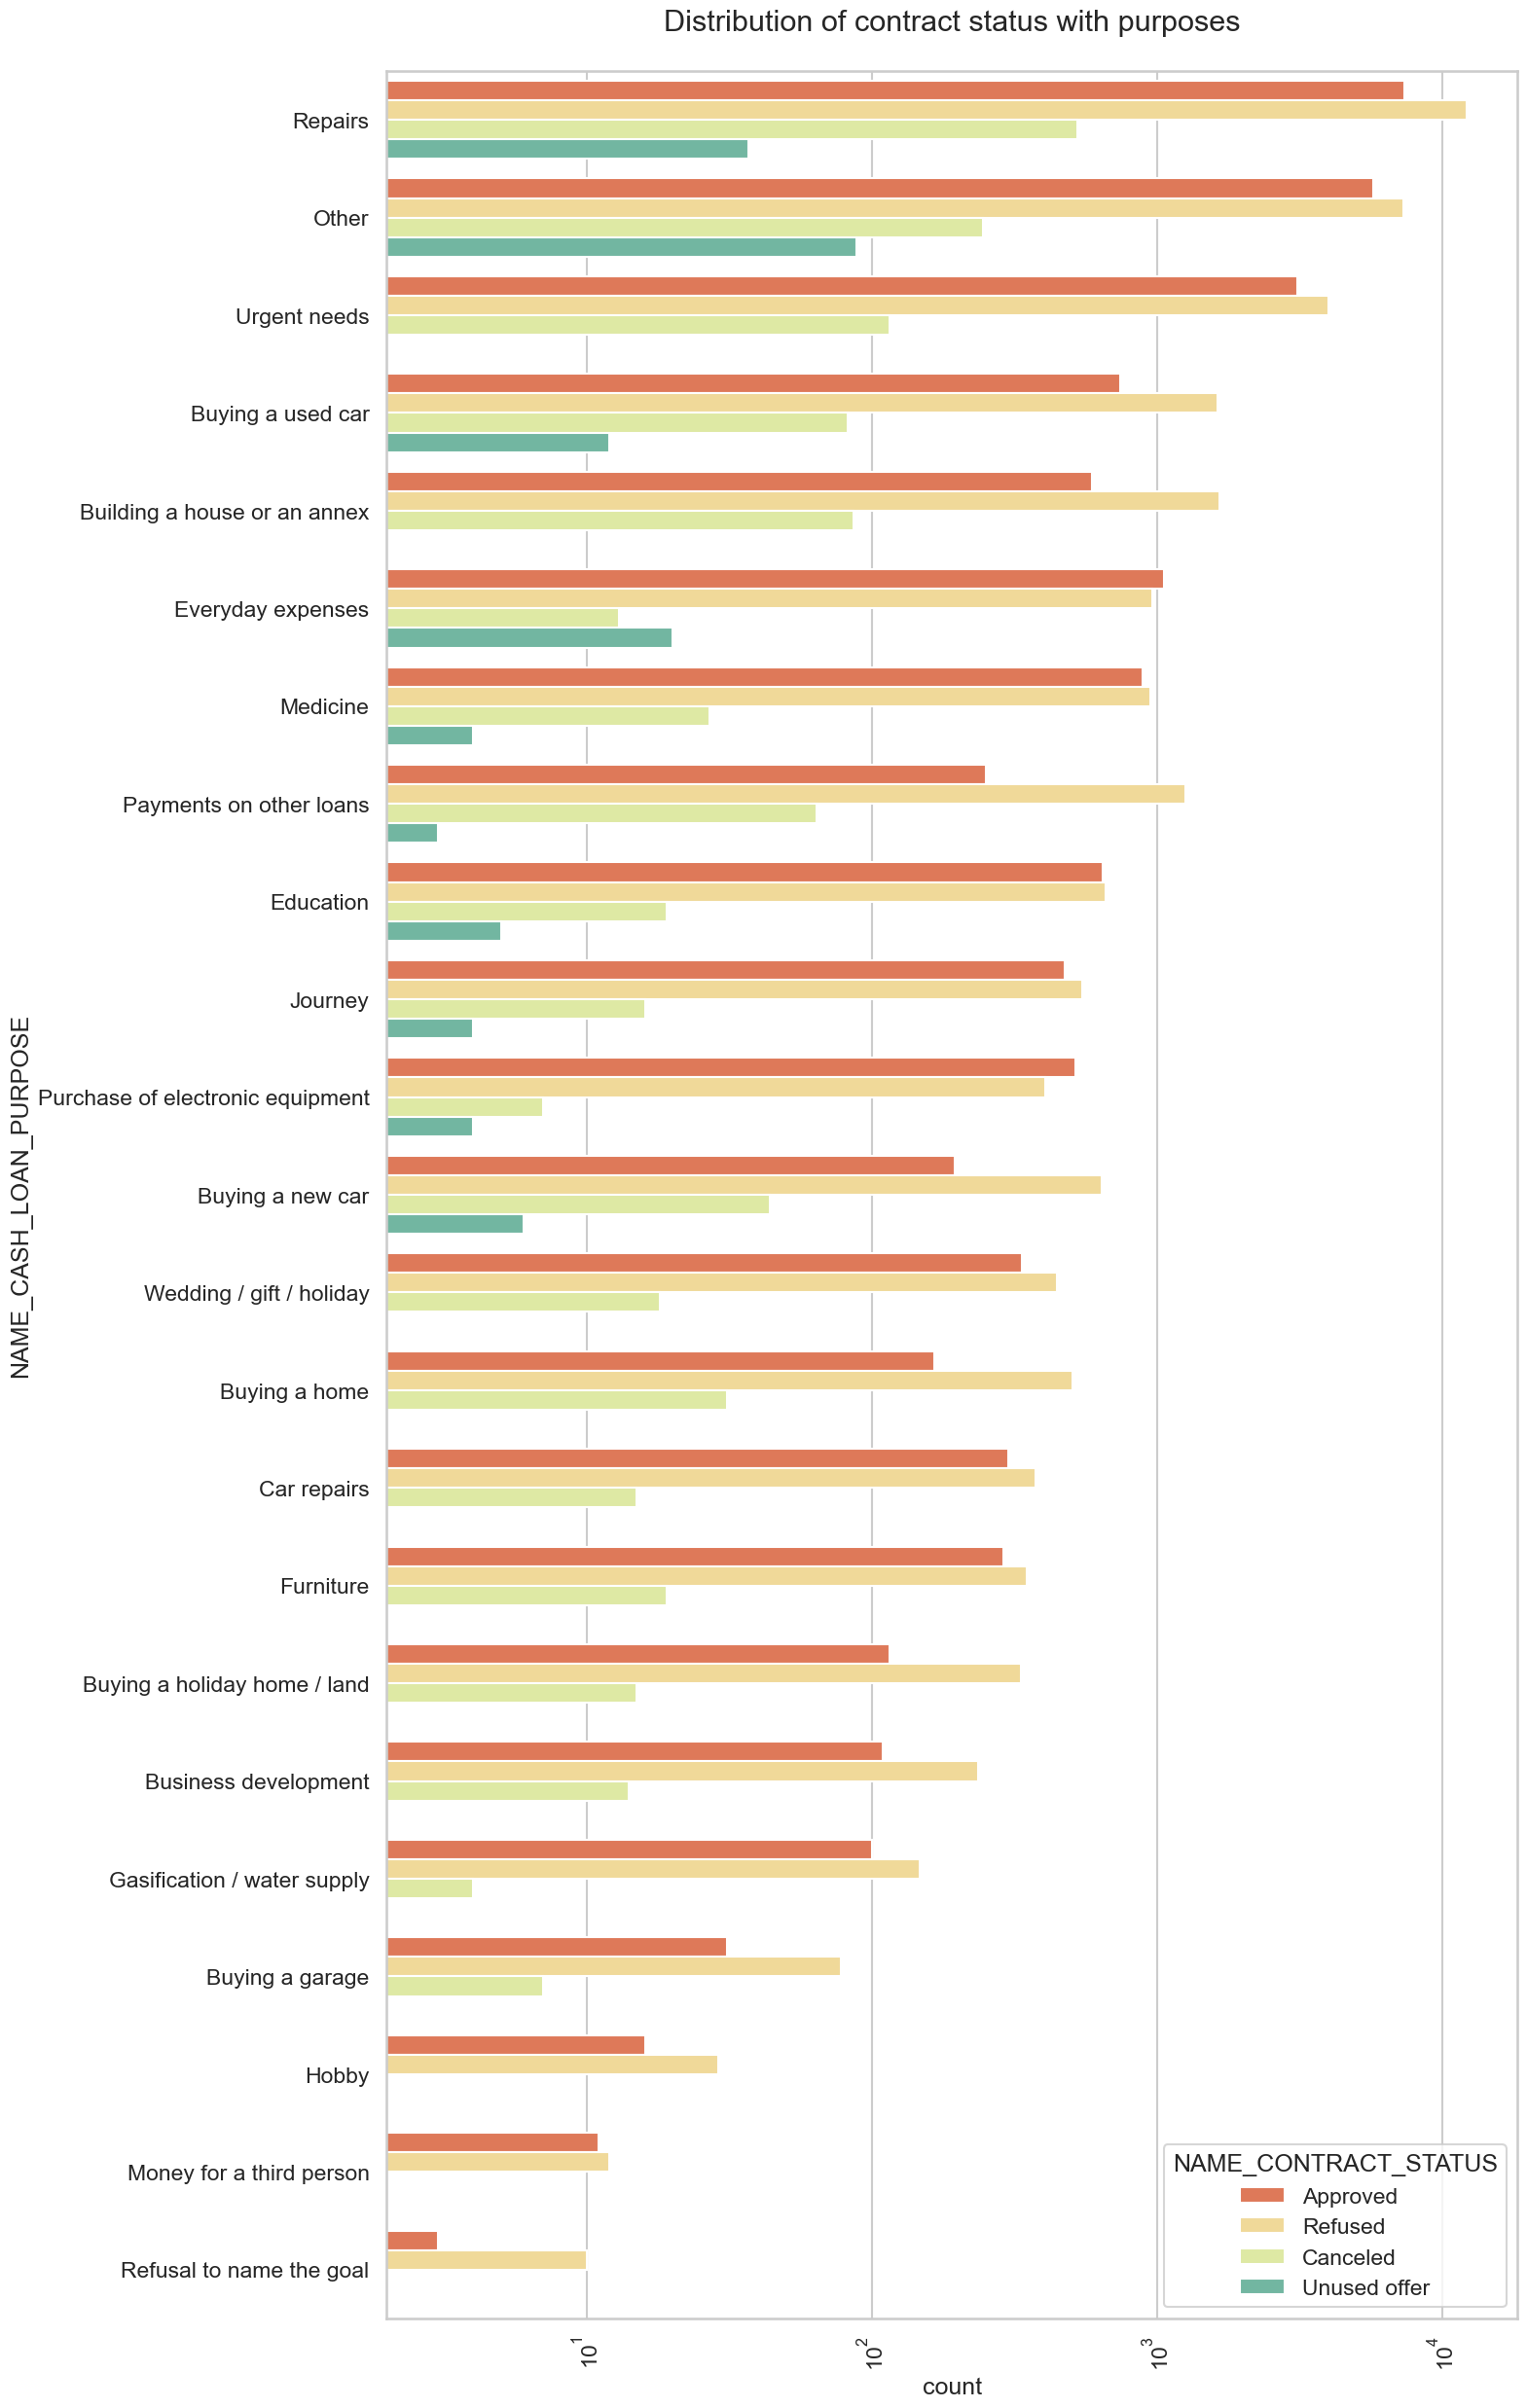

In [163]:
#### Performing univariate analysis

# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='Spectral') 

In [164]:
#### Key observations inferred from the provided plot include:

    #1. Loan Rejection: The highest number of loan rejections stem from the purpose labeled 'repairs.'
    #2. Education Loan: The count of approvals and rejections for education-related loans appears to be balanced, suggesting that the decision on these loans is not significantly biased toward either outcome.
    #3. Loan Purposes with Significant Rejections: Loan purposes related to 'paying other loans' and 'buying a new car' exhibit notably higher counts of loan rejections compared to approvals.

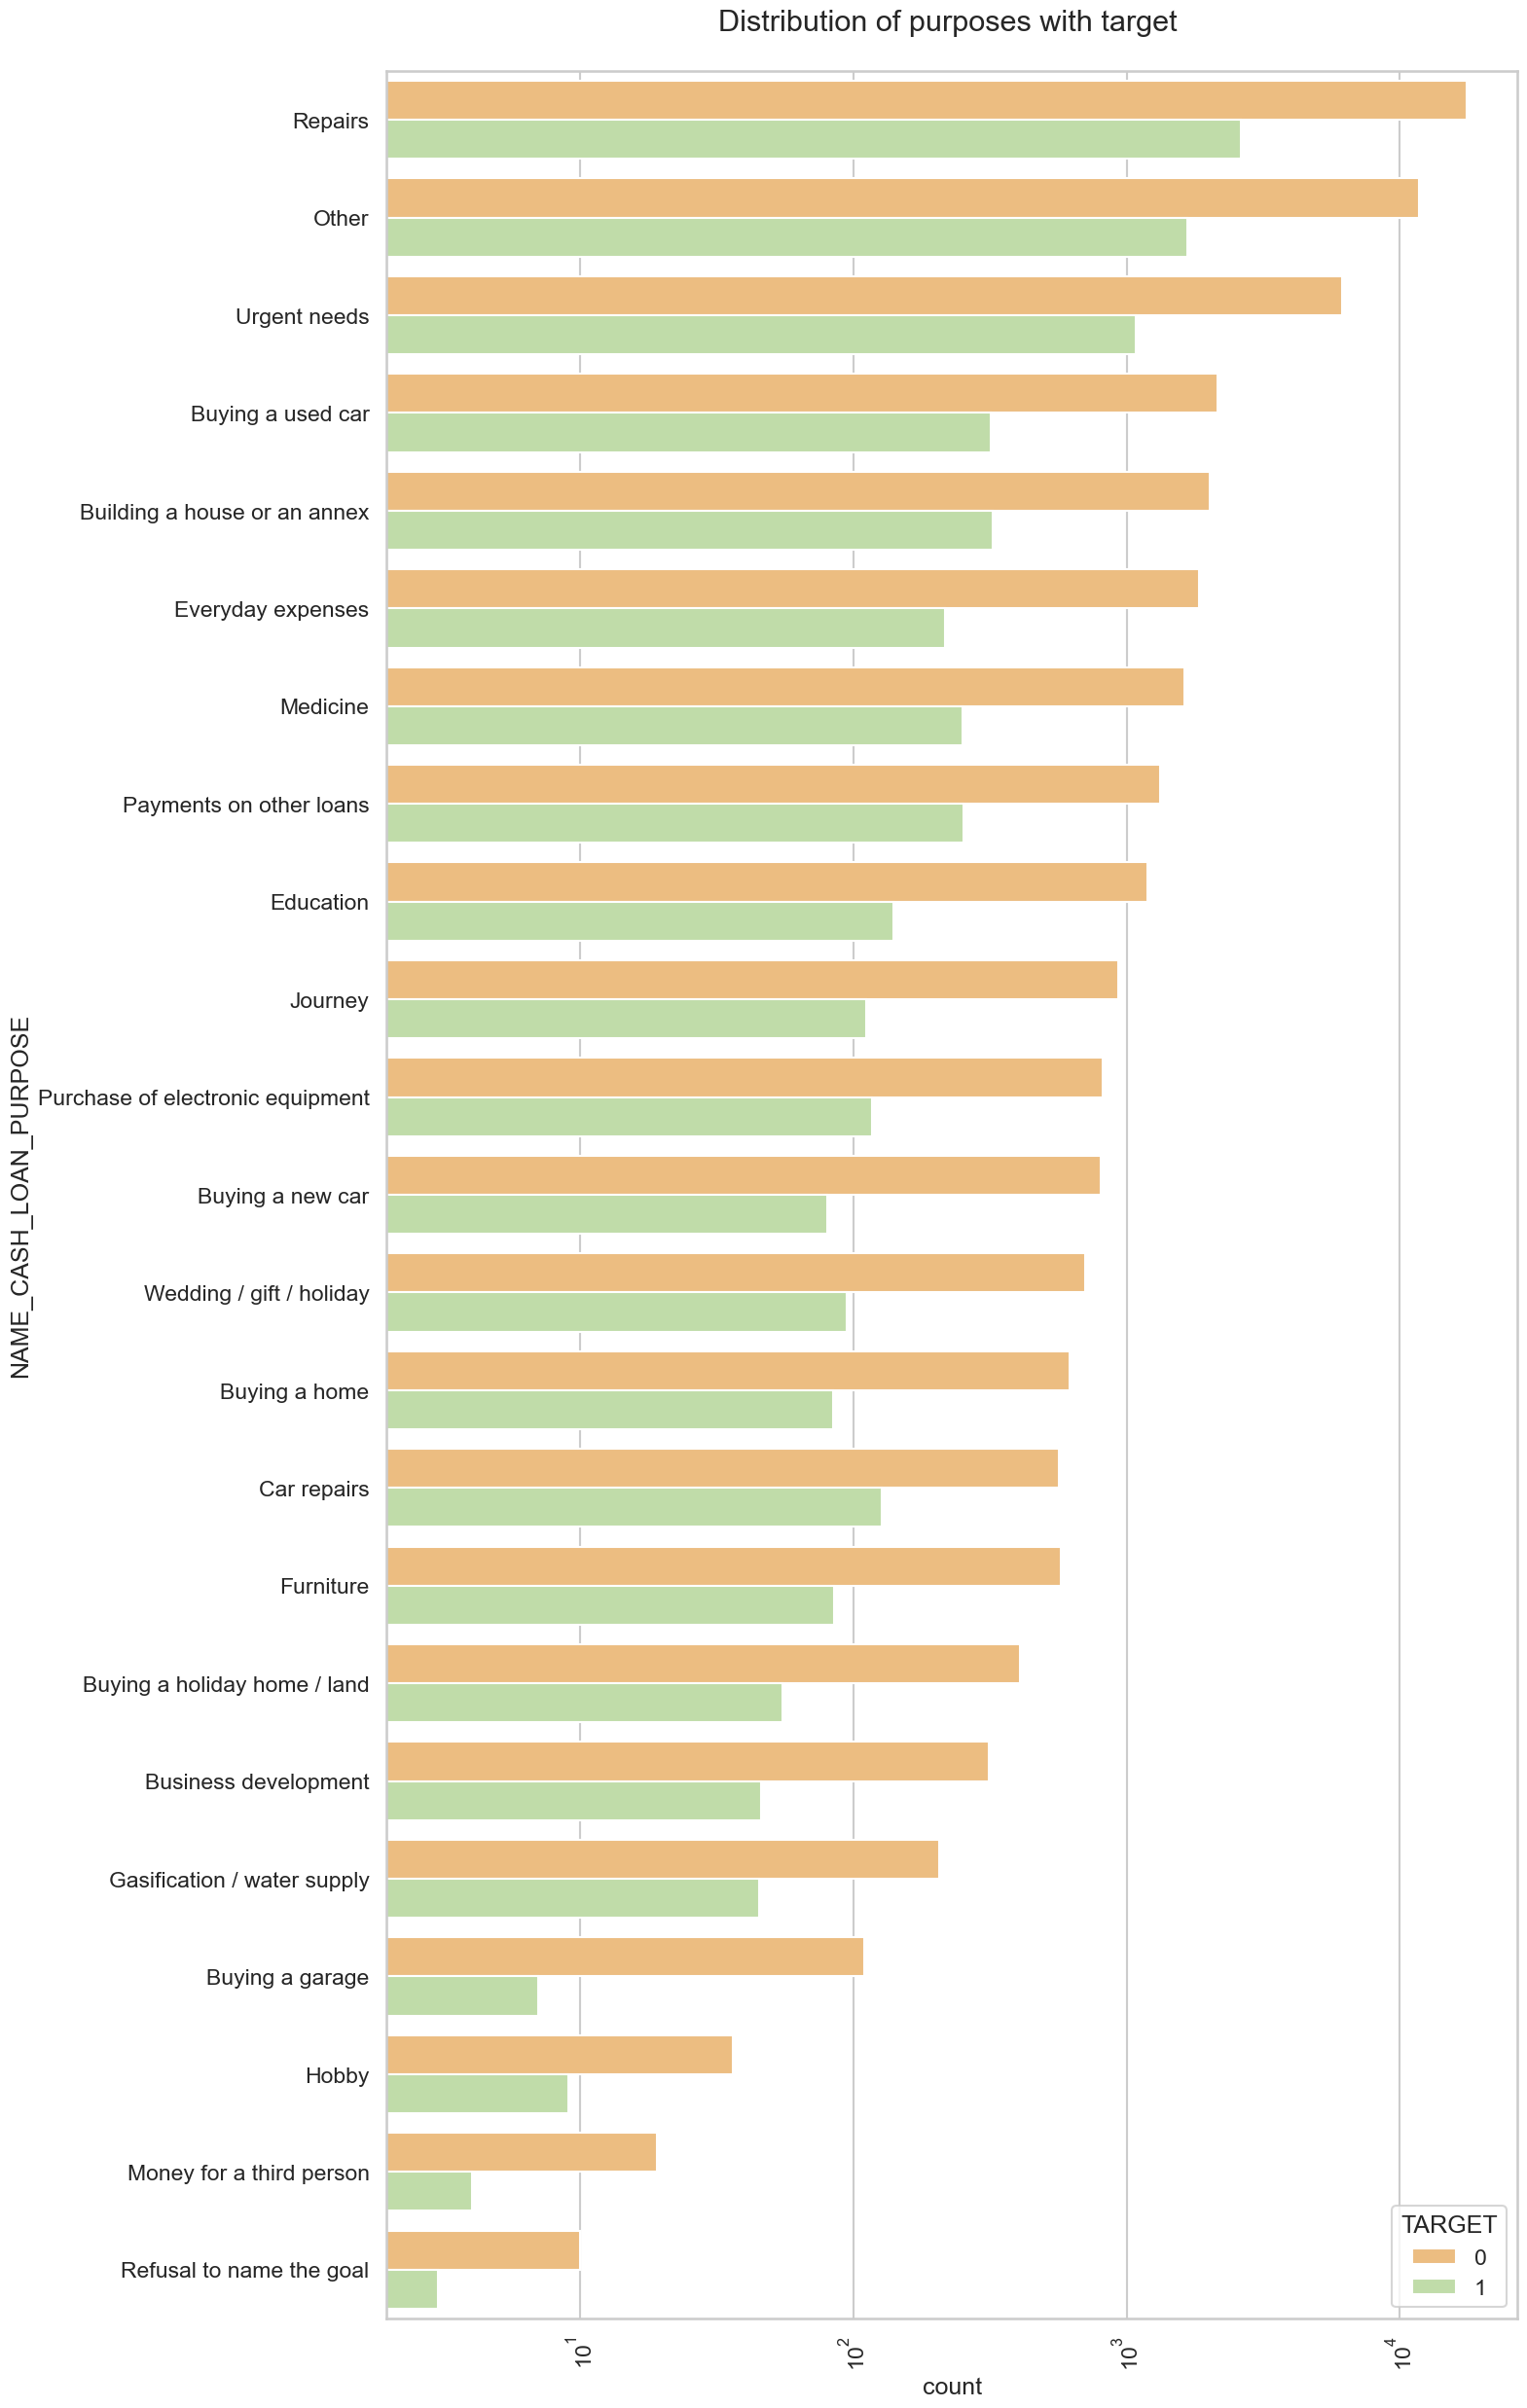

In [165]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='Spectral') 

In [166]:
#### Additional insights that can be drawn from the provided plot are as follows:

    #1. Loan Difficulties and Purpose: Loans intended for 'Repairs' encounter the greatest challenges in on-time payment, highlighting the payment difficulties associated with this particular loan purpose.
    #2. Successful Payment Purposes: Conversely, several loan purposes exhibit notably higher instances of successful on-time payments. These purposes include 'Buying a garage,' 'Business development,' 'Buying land,' 'Buying a new car,' and 'Education.'

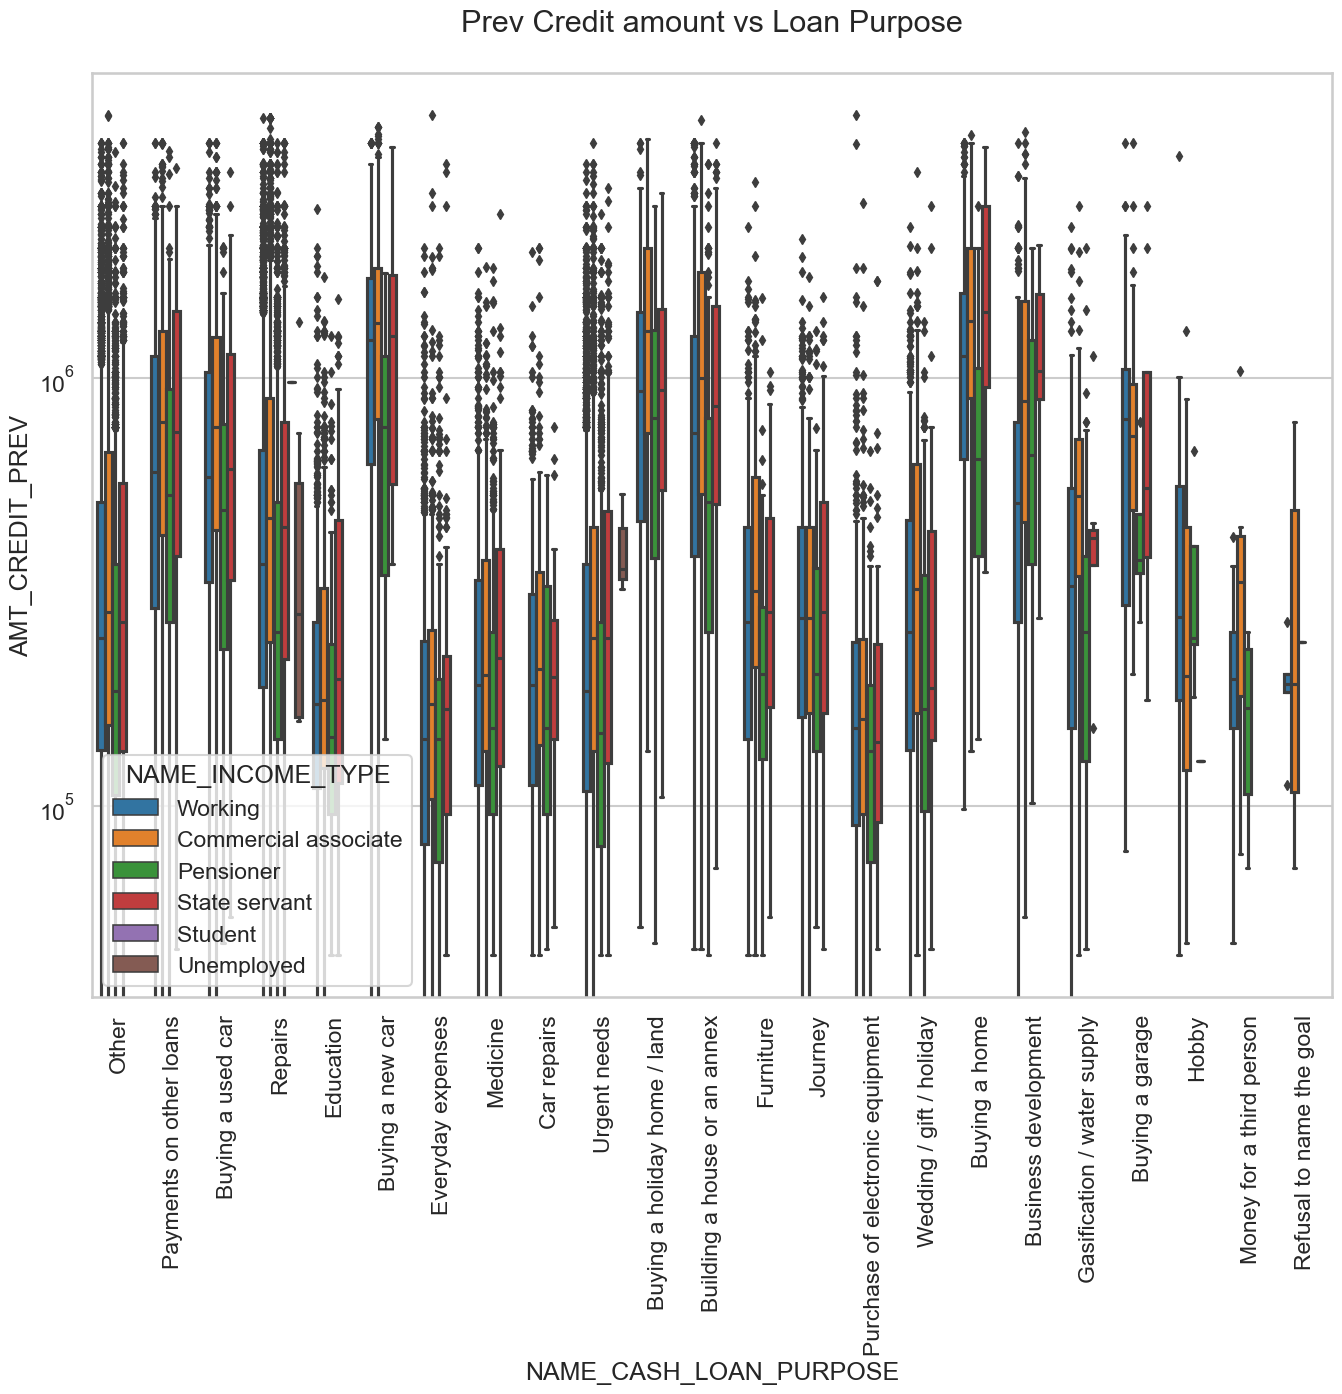

In [167]:
                            ##### Performing bivariate analysis
    
#Box plot for Credit amount 

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

In [168]:
#### Key conclusions that can be drawn from the provided information are:

    #1. Loan Purpose and Credit Amount: Loan purposes such as 'Buying a home,' 'Buying land,' 'Buying a new car,' and 'Building a house' are associated with higher credit amounts. These purposes likely involve substantial financial commitments, leading to larger credit applications.
    #2. Credit Application by State Servants: Individuals categorized as state servants exhibit a notable presence in terms of applying for significant credit amounts. This suggests that state servants are more likely to seek higher credit sums.
    #3. Limited Credit Applications for Third Person or Hobby: Purposes related to borrowing money for a third person or engaging in hobbies reflect lower credit application counts. These activities might involve smaller financial transactions compared to other loan intents.

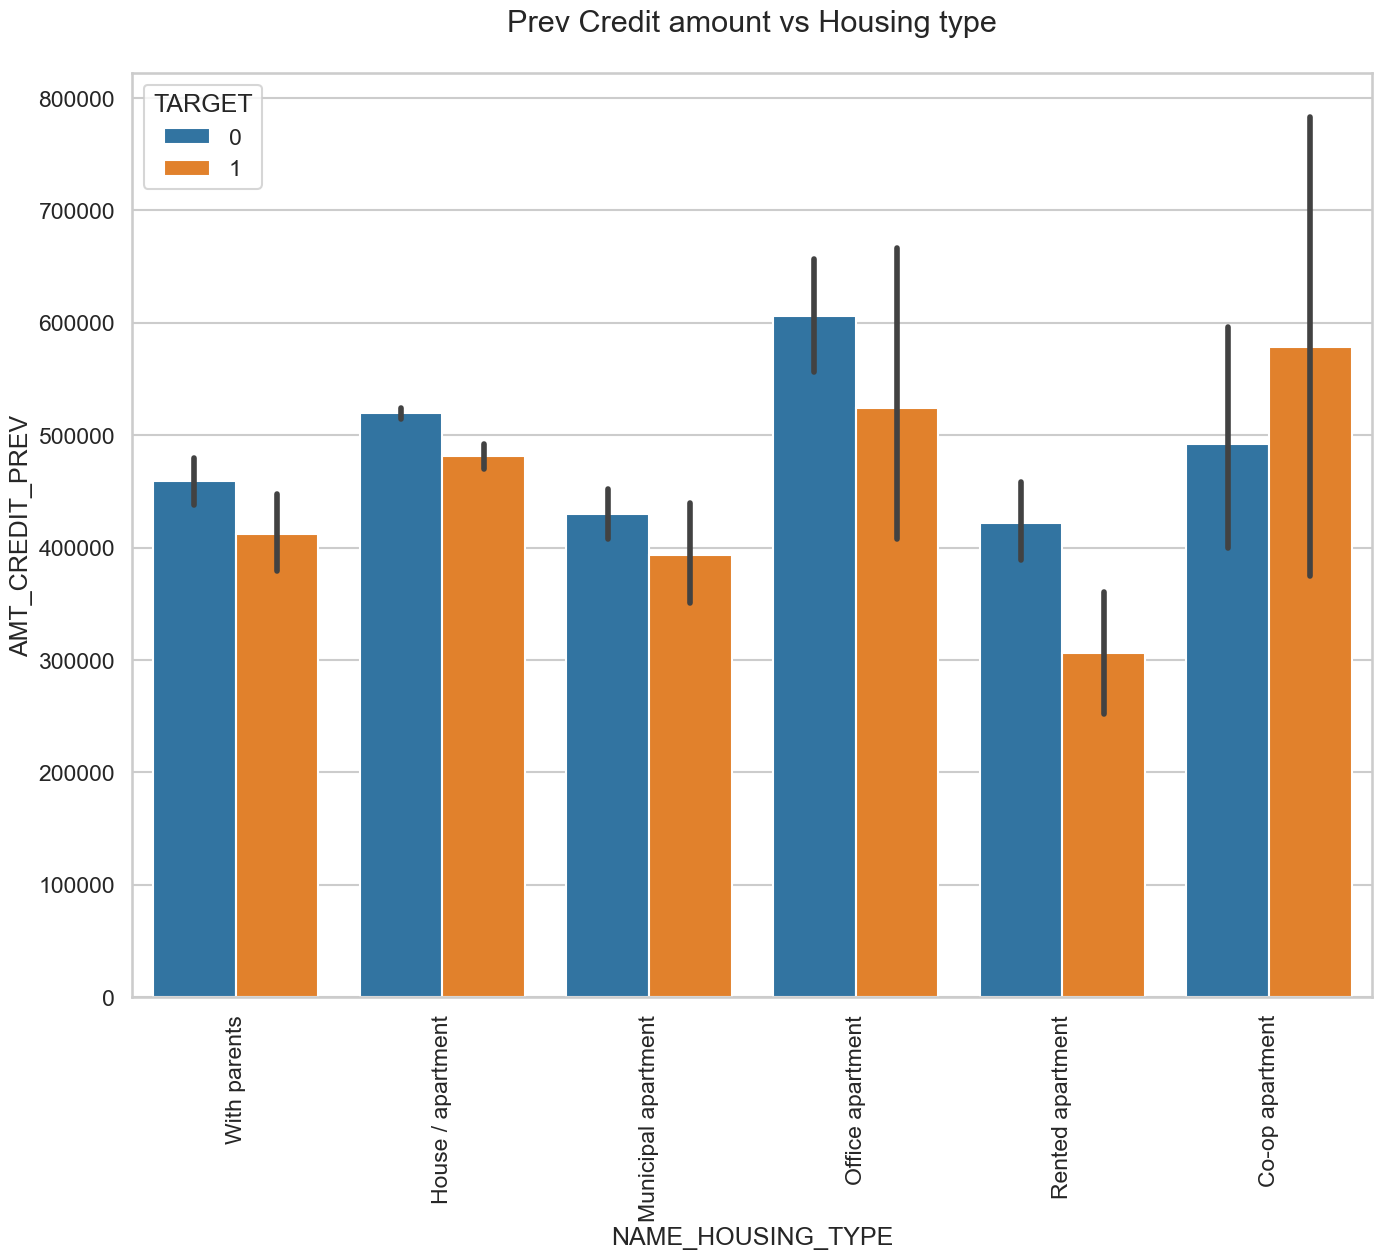

In [169]:
# Box plot for Credit amount prev vs Housing type

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

In [170]:

####   The analysis of housing types and their corresponding credit behaviors reveals valuable insights:

    #1. Target = 0 - Credit Behavior for Housing Types: In cases where the target variable is '0,' housing types like 'office apartment' exhibit higher credit activity. This suggests a propensity for successful payment among applicants with 'office apartments' in this target group.
    #2. Target = 1 - Credit Behavior for Housing Types: Conversely, when the target variable is '1,' the 'co-op apartment' housing type demonstrates elevated credit utilization. This indicates a potential difficulty in payment among applicants with 'co-op apartments' in this target group.



In [171]:
#### Based on these findings, several recommendations can be made:

    #1. Loan Cautions for Co-op Apartments: The bank should exercise caution when providing loans for the 'co-op apartment' housing type, particularly for 'target = 1.' There seems to be a higher likelihood of payment challenges among applicants with this housing type.
    #2. Focus on Successful Payment Housing Types: The bank should prioritize housing types like 'parents' house/apartment' or 'municipal apartment' for potential loans. These categories show indications of successful payment behavior and could be more favorable for lending.



In [ ]:
#### These conclusions offer actionable insights for the bank's lending strategy, helping to target housing types that are more likely to yield successful credit payments while avoiding potential challenges.